In [69]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
train_folder = "train_tsv/train_tsv"
test_folder = "test_tsv/test_tsv"
train_metadata = "metadata/training_metadata.csv"
test_metadata = "metadata/test_metadata.csv"

In [72]:
train_folder

'train_tsv/train_tsv'

In [73]:
def extract_upper_triangular(folder_path):
    """
    Extract upper triangular values (excluding diagonal) from all matrices in the folder.
    Args:
        folder_path (str): Path to the folder containing .tsv files.
    Returns:
        pd.DataFrame: DataFrame with rows as individuals and columns as features.
    """
    data = []
    file_names = []
    for file in os.listdir(folder_path):
        if file.endswith(".tsv"):
            file_path = os.path.join(folder_path, file)
            matrix = pd.read_csv(file_path, sep="\t", header=None)  # Load matrix
            upper_tri_values = matrix.values[np.triu_indices(200, k=1)]  # Extract upper triangular values
            data.append(upper_tri_values)
            file_names.append(file)  # Store file name for metadata merging
    # Create a DataFrame from the extracted features
    columns = [f"feature_{i}" for i in range(len(data[0]))]
    feature_df = pd.DataFrame(data, columns=columns)
    feature_df["file_name"] = file_names
    return feature_df


In [74]:
train_features = extract_upper_triangular(train_folder)
print("Training Features Shape:", train_features.shape)


Training Features Shape: (1103, 19901)


In [75]:
test_features = extract_upper_triangular(test_folder)
print("Test Features Shape:", test_features.shape)


Test Features Shape: (474, 19901)


In [76]:
train_features

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_19891,feature_19892,feature_19893,feature_19894,feature_19895,feature_19896,feature_19897,feature_19898,feature_19899,file_name
0,0.542132,0.524147,0.446293,0.356702,0.739596,0.417589,0.463915,-0.059056,0.144390,0.092703,...,-0.286273,-0.332391,-0.409157,0.504262,0.664123,-0.057485,0.748110,0.142378,0.296164,sub-NDARAA306NT2_ses-HBNsiteRU_task-rest_run-2...
1,0.144605,0.680939,0.742041,0.499410,0.659166,0.602953,0.500101,0.169859,0.350741,0.137694,...,-0.161798,0.009207,-0.148049,0.552436,0.315517,0.246594,0.540811,0.424833,0.441298,sub-NDARAA504CRN_ses-HBNsiteCBIC_task-rest_run...
2,0.081803,0.489407,0.254730,0.672230,0.676404,0.568564,0.490022,0.011483,0.494971,0.282925,...,-0.219611,-0.106881,-0.173596,0.774373,0.497188,0.735175,0.439800,0.660630,0.584419,sub-NDARAA536PTU_ses-HBNsiteSI_task-rest_atlas...
3,0.269198,0.575656,0.116223,0.243510,0.469461,0.493588,0.704042,0.393960,0.549350,0.362526,...,0.283312,0.335506,0.403968,0.639758,0.193913,0.443404,0.325009,0.402427,0.710231,sub-NDARAB055BPR_ses-HBNsiteRU_task-rest_run-1...
4,0.280142,0.617829,0.715562,0.532753,0.671096,0.708990,0.543851,0.258549,0.255543,0.116425,...,0.004876,-0.042176,0.097162,0.677090,0.563419,0.551032,0.703349,0.533178,0.443124,sub-NDARAB458VK9_ses-HBNsiteCBIC_task-rest_run...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,0.272483,0.475963,0.621098,0.461103,0.619747,0.381610,0.514269,-0.024980,0.446803,0.359285,...,-0.250915,-0.194049,-0.135507,0.475748,0.306222,0.309193,0.320800,0.447399,0.537090,sub-NDARZV766YXP_ses-HBNsiteSI_task-rest_atlas...
1099,-0.216297,0.421727,0.274872,0.275829,0.506188,0.477437,0.614731,-0.047517,0.597256,0.435380,...,-0.022511,-0.194110,0.290195,0.529892,0.204607,0.413545,0.543575,0.629435,0.470762,sub-NDARZV895RZ5_ses-HBNsiteRU_task-rest_run-1...
1100,0.284618,0.664284,0.493504,0.677108,0.689578,0.685526,0.673373,0.549470,0.561696,0.457468,...,0.313216,-0.207260,0.070638,0.435885,-0.161306,-0.027926,-0.067884,0.252370,0.586030,sub-NDARZW363UGM_ses-HBNsiteRU_task-rest_run-1...
1101,0.038139,0.806189,0.207843,0.781122,0.851647,0.715057,0.594198,0.425432,0.513071,0.445690,...,-0.377994,-0.106169,-0.085111,0.710481,0.550393,0.398278,0.529529,0.514517,0.660186,sub-NDARZW873DN3_ses-HBNsiteCBIC_task-rest_run...


In [77]:
train_metadata = pd.read_csv(train_metadata)
test_metadata = pd.read_csv(test_metadata)

print("Train Metadata Shape:", train_metadata.shape)
print("Test Metadata Shape:", test_metadata.shape)


Train Metadata Shape: (1104, 14)
Test Metadata Shape: (474, 13)


In [78]:
train_metadata

,participant_id,age,sex,study_site,bmi,ethnicity,race,handedness,parent_1_education,parent_2_education,p_factor_fs,internalizing_fs,externalizing_fs,attention_fs
0,NDARZE963MEU,15.33,Female,HBNsiteCBIC,28.52,Not_Hispanic_or_Latino,White,Right,Complete_tertiary,Complete_tertiary,0.32,1.79,1.20,-1.62
1,NDARCB305AFY,9.43,Female,HBNsiteCBIC,16.23,Not_Hispanic_or_Latino,White,Right,Complete_tertiary,Complete_tertiary,-1.48,-0.80,-0.36,0.96
2,NDARKK597VDH,13.85,Male,HBNsiteCBIC,16.27,Not_Hispanic_or_Latino,Other,Right,Complete_tertiary,Complete_tertiary,0.02,-1.54,0.84,1.11
3,NDARMR277TT7,9.68,Female,HBNsiteRU,16.55,Not_Hispanic_or_Latino,Black,Left,Complete_primary,Complete_tertiary,1.29,-0.22,0.74,-0.97
4,NDARDB161LU6,12.79,Male,HBNsiteCBIC,14.27,Hispanic_or_Latino,White,Right,Complete_tertiary,Complete_secondary,-0.15,0.69,-1.08,-0.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,NDARMM326JCB,9.72,Male,HBNsiteRU,14.44,Not_Hispanic_or_Latino,Other,Right,Complete_tertiary,Complete_tertiary,0.36,-0.18,-0.82,-1.39
1100,NDARRR633WLE,10.73,Male,HBNsiteCBIC,22.42,Not_Hispanic_or_Latino,White,Right,Complete_tertiary,Complete_tertiary,-1.17,-0.25,-0.48,0.67
1101,NDARFG943GVZ,9.63,Female,HBNsiteCBIC,14.83,Hispanic_or_Latino,White,Right,Complete_secondary,Complete_tertiary,-1.17,-0.92,-0.47,0.98
1102,NDARZC499NVX,11.20,Male,HBNsiteRU,24.90,Hispanic_or_Latino,Other,Right,Complete_tertiary,Complete_tertiary,2.67,1.28,-0.39,0.49


In [79]:
test_metadata

,participant_id,sex,study_site,bmi,ethnicity,race,handedness,parent_1_education,parent_2_education,p_factor_fs,internalizing_fs,externalizing_fs,attention_fs
0,NDARHC737MHK,Male,HBNsiteRU,15.85,Not_Hispanic_or_Latino,White,Right,Complete_tertiary,Complete_tertiary,1.03,1.11,-0.84,0.01
1,NDARAA075AMK,Female,HBNsiteSI,14.86,NaN,NaN,Right,Complete_tertiary,Complete_tertiary,-1.61,-0.74,-0.31,-0.43
2,NDARGY148EVU,Male,HBNsiteSI,20.41,Not_Hispanic_or_Latino,White,Right,Complete_primary,Complete_tertiary,0.41,0.30,-0.06,0.82
3,NDARZA511FYF,Male,HBNsiteCBIC,17.36,Not_Hispanic_or_Latino,White,Right,Complete_tertiary,Complete_tertiary,-0.81,0.00,2.13,0.33
4,NDARDE877RFH,Male,HBNsiteCBIC,16.03,Not_Hispanic_or_Latino,Black,Right,NaN,NaN,-0.87,2.45,-0.63,-0.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,NDARRY768ZH3,Male,HBNsiteCBIC,16.81,NaN,NaN,Right,Complete_tertiary,Complete_tertiary,0.12,2.33,-0.88,0.73
470,NDARFG118DW3,Male,HBNsiteCBIC,16.43,Not_Hispanic_or_Latino,Other,Right,Complete_secondary,Complete_tertiary,0.29,-0.48,0.05,-0.18
471,NDARAR238RZ8,Male,HBNsiteCBIC,19.47,Not_Hispanic_or_Latino,White,Right,Complete_tertiary,Complete_tertiary,-1.08,0.37,-0.52,0.91
472,NDARKH837TB2,Female,HBNsiteRU,16.06,Not_Hispanic_or_Latino,White,Right,Complete_tertiary,Complete_tertiary,1.21,-0.02,0.44,-2.18


In [80]:
train_features['participant_id'] = train_features['file_name'].str.extract(r'(NDAR\w{8})')


In [81]:
merged_data = pd.merge(train_features, train_metadata, on='participant_id', how='inner')


In [82]:
merged_data

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,bmi,ethnicity,race,handedness,parent_1_education,parent_2_education,p_factor_fs,internalizing_fs,externalizing_fs,attention_fs
0,0.542132,0.524147,0.446293,0.356702,0.739596,0.417589,0.463915,-0.059056,0.144390,0.092703,...,30.72,Not_Hispanic_or_Latino,Other,Right,Complete_secondary,Complete_tertiary,1.31,1.71,-1.09,-0.68
1,0.144605,0.680939,0.742041,0.499410,0.659166,0.602953,0.500101,0.169859,0.350741,0.137694,...,16.51,Hispanic_or_Latino,Other,Right,NaN,Complete_tertiary,-0.06,1.86,0.19,0.09
2,0.081803,0.489407,0.254730,0.672230,0.676404,0.568564,0.490022,0.011483,0.494971,0.282925,...,21.33,Hispanic_or_Latino,NaN,Left,Complete_tertiary,Complete_tertiary,0.45,-1.27,-0.10,0.79
3,0.269198,0.575656,0.116223,0.243510,0.469461,0.493588,0.704042,0.393960,0.549350,0.362526,...,26.90,Not_Hispanic_or_Latino,Black,Right,Complete_primary,Complete_tertiary,0.77,-0.37,-0.57,1.40
4,0.280142,0.617829,0.715562,0.532753,0.671096,0.708990,0.543851,0.258549,0.255543,0.116425,...,15.77,Hispanic_or_Latino,White,Right,Complete_secondary,Complete_secondary,-0.42,-0.55,-0.24,0.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,0.272483,0.475963,0.621098,0.461103,0.619747,0.381610,0.514269,-0.024980,0.446803,0.359285,...,14.01,Hispanic_or_Latino,NaN,Right,Complete_primary,Complete_tertiary,0.32,0.39,-1.71,-0.51
1097,-0.216297,0.421727,0.274872,0.275829,0.506188,0.477437,0.614731,-0.047517,0.597256,0.435380,...,16.04,Not_Hispanic_or_Latino,White,Right,Complete_tertiary,Complete_tertiary,-0.18,1.93,-0.43,-1.25
1098,0.284618,0.664284,0.493504,0.677108,0.689578,0.685526,0.673373,0.549470,0.561696,0.457468,...,18.47,Hispanic_or_Latino,NaN,Left,Complete_tertiary,Complete_tertiary,0.15,0.42,0.71,-0.06
1099,0.038139,0.806189,0.207843,0.781122,0.851647,0.715057,0.594198,0.425432,0.513071,0.445690,...,26.70,Not_Hispanic_or_Latino,Black,Right,Complete_tertiary,Complete_tertiary,0.20,2.16,-0.70,-1.53


In [83]:
test_features['participant_id'] = test_features['file_name'].str.extract(r'(NDAR\w{8})')


In [84]:
merged_data_test = pd.merge(test_features, test_metadata, on='participant_id', how='inner')


In [85]:
merged_data_test.head(5)

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,bmi,ethnicity,race,handedness,parent_1_education,parent_2_education,p_factor_fs,internalizing_fs,externalizing_fs,attention_fs
0,0.524855,0.484972,0.492336,0.517045,0.468494,0.553764,0.555734,0.300393,0.395799,0.263726,...,14.86,NaN,NaN,Right,Complete_tertiary,Complete_tertiary,-1.61,-0.74,-0.31,-0.43
1,-0.303114,0.760065,0.444488,0.705790,0.827377,0.739177,0.685885,0.382692,0.629805,0.256382,...,17.84,Not_Hispanic_or_Latino,White,Right,Complete_secondary,Complete_tertiary,-0.08,-0.37,0.37,0.12
2,0.228731,0.704443,0.517845,0.388577,0.495863,0.561603,0.466160,0.134430,0.478563,0.306227,...,18.32,Not_Hispanic_or_Latino,White,Right,Complete_primary,Complete_tertiary,1.31,-1.75,-0.58,0.19
3,0.168970,0.709427,0.633803,0.533424,0.449741,0.528832,0.511939,0.275791,0.495998,-0.017472,...,16.18,Not_Hispanic_or_Latino,White,Left,Complete_tertiary,Complete_tertiary,0.03,-1.54,-0.20,1.10
4,0.071224,0.697654,0.685984,0.521219,0.621353,0.546660,0.446338,0.464537,0.481348,0.328609,...,15.97,Not_Hispanic_or_Latino,White,Right,Complete_tertiary,Complete_tertiary,0.16,0.49,0.18,-0.58


In [86]:
merged_data.head(5)

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,bmi,ethnicity,race,handedness,parent_1_education,parent_2_education,p_factor_fs,internalizing_fs,externalizing_fs,attention_fs
0,0.542132,0.524147,0.446293,0.356702,0.739596,0.417589,0.463915,-0.059056,0.144390,0.092703,...,30.72,Not_Hispanic_or_Latino,Other,Right,Complete_secondary,Complete_tertiary,1.31,1.71,-1.09,-0.68
1,0.144605,0.680939,0.742041,0.499410,0.659166,0.602953,0.500101,0.169859,0.350741,0.137694,...,16.51,Hispanic_or_Latino,Other,Right,NaN,Complete_tertiary,-0.06,1.86,0.19,0.09
2,0.081803,0.489407,0.254730,0.672230,0.676404,0.568564,0.490022,0.011483,0.494971,0.282925,...,21.33,Hispanic_or_Latino,NaN,Left,Complete_tertiary,Complete_tertiary,0.45,-1.27,-0.10,0.79
3,0.269198,0.575656,0.116223,0.243510,0.469461,0.493588,0.704042,0.393960,0.549350,0.362526,...,26.90,Not_Hispanic_or_Latino,Black,Right,Complete_primary,Complete_tertiary,0.77,-0.37,-0.57,1.40
4,0.280142,0.617829,0.715562,0.532753,0.671096,0.708990,0.543851,0.258549,0.255543,0.116425,...,15.77,Hispanic_or_Latino,White,Right,Complete_secondary,Complete_secondary,-0.42,-0.55,-0.24,0.15


In [87]:
merged_data.info

<bound method DataFrame.info of       feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0      0.542132   0.524147   0.446293   0.356702   0.739596   0.417589   
1      0.144605   0.680939   0.742041   0.499410   0.659166   0.602953   
2      0.081803   0.489407   0.254730   0.672230   0.676404   0.568564   
3      0.269198   0.575656   0.116223   0.243510   0.469461   0.493588   
4      0.280142   0.617829   0.715562   0.532753   0.671096   0.708990   
...         ...        ...        ...        ...        ...        ...   
1096   0.272483   0.475963   0.621098   0.461103   0.619747   0.381610   
1097  -0.216297   0.421727   0.274872   0.275829   0.506188   0.477437   
1098   0.284618   0.664284   0.493504   0.677108   0.689578   0.685526   
1099   0.038139   0.806189   0.207843   0.781122   0.851647   0.715057   
1100   0.414652   0.782604   0.646607   0.682558   0.787758   0.731182   

      feature_6  feature_7  feature_8  feature_9  ...    bmi  \
0      0.463915

In [88]:
merged_data.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_19896,feature_19897,feature_19898,feature_19899,age,bmi,p_factor_fs,internalizing_fs,externalizing_fs,attention_fs
count,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,...,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1083.000000,1101.000000,1101.000000,1101.000000,1101.000000
mean,0.180615,0.578046,0.430797,0.450557,0.588955,0.549830,0.506781,0.278353,0.421036,0.257493,...,0.358531,0.491534,0.468092,0.535302,11.189537,19.831385,0.216621,0.102361,0.090936,0.082316
std,0.234255,0.172424,0.229925,0.208482,0.194165,0.161146,0.180043,0.191303,0.206216,0.209193,...,0.193183,0.179940,0.179251,0.174911,3.230611,4.957974,1.001061,1.016719,1.068050,0.994285
min,-0.657053,-0.224815,-0.517318,-0.440235,-0.486239,-0.059139,-0.181009,-0.341516,-0.353362,-0.578757,...,-0.553067,-0.302408,-0.307228,-0.182108,5.050000,12.600000,-1.610000,-2.260000,-2.150000,-3.180000
25%,0.022433,0.486244,0.281426,0.319150,0.486626,0.457743,0.404336,0.156756,0.303614,0.132934,...,0.236342,0.379522,0.356203,0.431752,8.660000,16.270000,-0.540000,-0.740000,-0.630000,-0.600000
50%,0.180916,0.597677,0.456149,0.480647,0.630450,0.574450,0.531906,0.287915,0.452510,0.273331,...,0.367044,0.516695,0.486060,0.556225,10.580000,18.560000,0.210000,0.070000,-0.240000,0.100000
75%,0.354694,0.708785,0.605539,0.603223,0.729746,0.667899,0.634296,0.417616,0.566586,0.403419,...,0.497075,0.625598,0.596952,0.667107,13.510000,22.160000,0.950000,0.910000,0.600000,0.860000
max,0.824448,0.907209,0.890422,0.876987,0.922309,0.882400,0.892983,0.803253,0.854104,0.828335,...,0.828784,0.861767,0.898459,0.903364,21.900000,46.100000,2.980000,2.820000,4.240000,2.480000


In [89]:
merged_data.dtypes

feature_0             float64
feature_1             float64
feature_2             float64
feature_3             float64
feature_4             float64
                       ...   
parent_2_education     object
p_factor_fs           float64
internalizing_fs      float64
externalizing_fs      float64
attention_fs          float64
Length: 19915, dtype: object

In [90]:
merged_data.columns

Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       ...
       'bmi', 'ethnicity', 'race', 'handedness', 'parent_1_education',
       'parent_2_education', 'p_factor_fs', 'internalizing_fs',
       'externalizing_fs', 'attention_fs'],
      dtype='object', length=19915)

In [91]:
print(merged_data.describe().T)  

                   count       mean       std        min        25%  \
feature_0         1101.0   0.180615  0.234255  -0.657053   0.022433   
feature_1         1101.0   0.578046  0.172424  -0.224815   0.486244   
feature_2         1101.0   0.430797  0.229925  -0.517318   0.281426   
feature_3         1101.0   0.450557  0.208482  -0.440235   0.319150   
feature_4         1101.0   0.588955  0.194165  -0.486239   0.486626   
...                  ...        ...       ...        ...        ...   
bmi               1083.0  19.831385  4.957974  12.600000  16.270000   
p_factor_fs       1101.0   0.216621  1.001061  -1.610000  -0.540000   
internalizing_fs  1101.0   0.102361  1.016719  -2.260000  -0.740000   
externalizing_fs  1101.0   0.090936  1.068050  -2.150000  -0.630000   
attention_fs      1101.0   0.082316  0.994285  -3.180000  -0.600000   

                        50%        75%        max  
feature_0          0.180916   0.354694   0.824448  
feature_1          0.597677   0.708785   0.

In [92]:
merged_data['age']

0       21.22
1        9.17
2       12.00
3       10.79
4       12.84
        ...  
1096    10.79
1097    10.35
1098    12.51
1099    13.44
1100    11.62
Name: age, Length: 1101, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

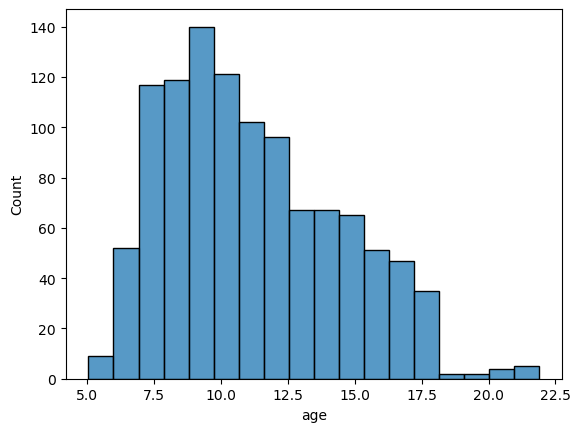

In [93]:
sns.histplot(merged_data['age'])

In [94]:
merged_data['race']

0       Other
1       Other
2         NaN
3       Black
4       White
        ...  
1096      NaN
1097    White
1098      NaN
1099    Black
1100    Black
Name: race, Length: 1101, dtype: object

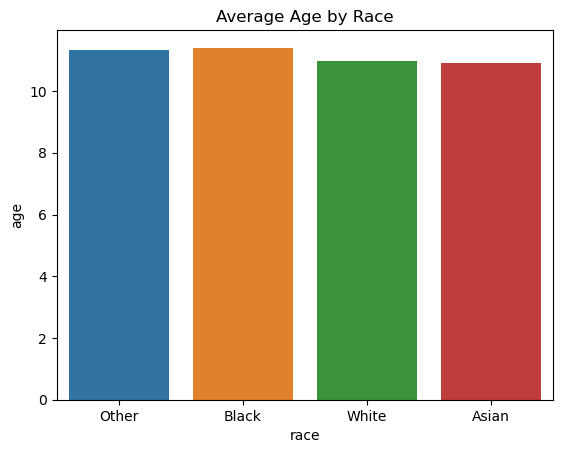

In [95]:
sns.barplot(x='race', y='age', data=merged_data, errorbar=None)
plt.title('Average Age by Race')
plt.show()

In [96]:
age_group = merged_data.groupby(['bmi', 'ethnicity', 'race', 'handedness'])['age'].agg(['count', 'min', 'max', 'mean', 'std']).reset_index()
age_group

,bmi,ethnicity,race,handedness,count,min,max,mean,std
0,12.60,Hispanic_or_Latino,Asian,Right,1,6.97,6.97,6.97,NaN
1,12.64,Not_Hispanic_or_Latino,White,Right,1,7.97,7.97,7.97,NaN
2,12.77,Not_Hispanic_or_Latino,Black,Left,1,7.06,7.06,7.06,NaN
3,12.79,Not_Hispanic_or_Latino,White,Right,1,9.69,9.69,9.69,NaN
4,12.85,Not_Hispanic_or_Latino,White,Right,1,8.85,8.85,8.85,NaN
...,...,...,...,...,...,...,...,...,...
766,39.04,Not_Hispanic_or_Latino,White,Right,1,15.17,15.17,15.17,NaN
767,39.34,Not_Hispanic_or_Latino,White,Right,1,14.91,14.91,14.91,NaN
768,42.67,Not_Hispanic_or_Latino,Other,Right,1,13.74,13.74,13.74,NaN
769,45.71,Not_Hispanic_or_Latino,White,Right,1,17.26,17.26,17.26,NaN


In [97]:
age_group.sort_values(by='mean', ascending=False)


,bmi,ethnicity,race,handedness,count,min,max,mean,std
760,35.89,Hispanic_or_Latino,Other,Right,1,21.25,21.25,21.25,NaN
737,30.72,Not_Hispanic_or_Latino,Other,Right,1,21.22,21.22,21.22,NaN
732,29.74,Not_Hispanic_or_Latino,White,Right,1,21.18,21.18,21.18,NaN
547,21.51,Not_Hispanic_or_Latino,Black,Right,1,20.27,20.27,20.27,NaN
765,38.34,Hispanic_or_Latino,Other,Right,1,20.16,20.16,20.16,NaN
...,...,...,...,...,...,...,...,...,...
148,15.69,Not_Hispanic_or_Latino,Other,Right,1,5.87,5.87,5.87,NaN
71,14.75,Not_Hispanic_or_Latino,White,Right,1,5.84,5.84,5.84,NaN
74,14.79,Hispanic_or_Latino,White,Left,1,5.82,5.82,5.82,NaN
642,24.02,Not_Hispanic_or_Latino,White,Right,1,5.40,5.40,5.40,NaN


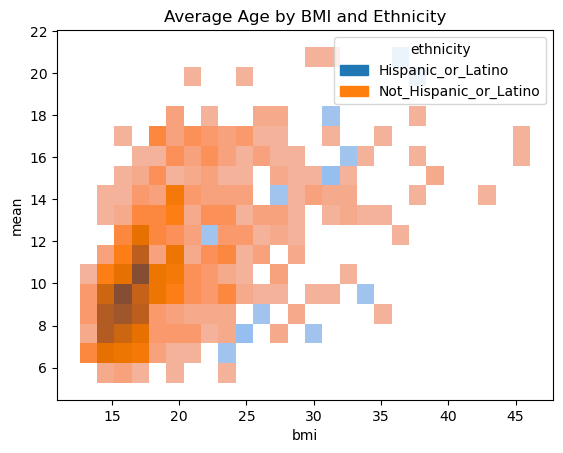

In [98]:
sns.histplot(data=age_group, x='bmi', y='mean', hue='ethnicity')
plt.title('Average Age by BMI and Ethnicity')
plt.show()

In [99]:
merged_data.isnull().sum()

feature_0              0
feature_1              0
feature_2              0
feature_3              0
feature_4              0
                      ..
parent_2_education    22
p_factor_fs            0
internalizing_fs       0
externalizing_fs       0
attention_fs           0
Length: 19915, dtype: int64

In [100]:
columns_with_nulls = merged_data.isnull().sum()[merged_data.isnull().sum() > 0]
print(columns_with_nulls)


bmi                    18
ethnicity             109
race                  168
parent_1_education    183
parent_2_education     22
dtype: int64


In [101]:
merged_data = merged_data.dropna()

In [102]:
merged_data

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,bmi,ethnicity,race,handedness,parent_1_education,parent_2_education,p_factor_fs,internalizing_fs,externalizing_fs,attention_fs
0,0.542132,0.524147,0.446293,0.356702,0.739596,0.417589,0.463915,-0.059056,0.144390,0.092703,...,30.72,Not_Hispanic_or_Latino,Other,Right,Complete_secondary,Complete_tertiary,1.31,1.71,-1.09,-0.68
3,0.269198,0.575656,0.116223,0.243510,0.469461,0.493588,0.704042,0.393960,0.549350,0.362526,...,26.90,Not_Hispanic_or_Latino,Black,Right,Complete_primary,Complete_tertiary,0.77,-0.37,-0.57,1.40
4,0.280142,0.617829,0.715562,0.532753,0.671096,0.708990,0.543851,0.258549,0.255543,0.116425,...,15.77,Hispanic_or_Latino,White,Right,Complete_secondary,Complete_secondary,-0.42,-0.55,-0.24,0.15
5,0.203130,0.433007,0.655580,0.685277,0.667523,0.668772,0.427946,0.124174,0.158637,0.162900,...,16.02,Not_Hispanic_or_Latino,White,Right,Complete_tertiary,Complete_tertiary,1.20,-1.47,-0.48,-0.58
7,-0.059902,0.635214,0.053475,0.350553,0.677248,0.428800,0.645720,0.347821,0.588368,0.455670,...,17.78,Not_Hispanic_or_Latino,White,Right,Complete_secondary,Complete_tertiary,0.99,0.03,-0.28,-1.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,0.229579,0.600617,0.368765,0.365199,0.611657,0.620640,0.539612,0.299367,0.344594,0.220920,...,22.83,Not_Hispanic_or_Latino,Black,Right,Complete_tertiary,Complete_tertiary,-1.10,1.23,-0.51,0.61
1094,0.127811,0.292289,0.389060,0.593261,0.553002,0.453138,0.391243,0.346273,0.310240,0.423172,...,31.92,Hispanic_or_Latino,Black,Right,Complete_secondary,Complete_secondary,-1.11,0.19,-0.50,-0.68
1095,-0.084592,0.623596,0.441824,0.645202,0.786968,0.691674,0.654924,0.273136,0.625980,0.451696,...,17.65,Not_Hispanic_or_Latino,Other,Right,Complete_tertiary,Complete_tertiary,0.41,-1.77,1.81,-0.28
1097,-0.216297,0.421727,0.274872,0.275829,0.506188,0.477437,0.614731,-0.047517,0.597256,0.435380,...,16.04,Not_Hispanic_or_Latino,White,Right,Complete_tertiary,Complete_tertiary,-0.18,1.93,-0.43,-1.25


In [103]:
merged_data.isnull().sum()

feature_0             0
feature_1             0
feature_2             0
feature_3             0
feature_4             0
                     ..
parent_2_education    0
p_factor_fs           0
internalizing_fs      0
externalizing_fs      0
attention_fs          0
Length: 19915, dtype: int64

In [104]:
merged_data.duplicated().sum()

0

In [105]:
merged_data.head

<bound method NDFrame.head of       feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0      0.542132   0.524147   0.446293   0.356702   0.739596   0.417589   
3      0.269198   0.575656   0.116223   0.243510   0.469461   0.493588   
4      0.280142   0.617829   0.715562   0.532753   0.671096   0.708990   
5      0.203130   0.433007   0.655580   0.685277   0.667523   0.668772   
7     -0.059902   0.635214   0.053475   0.350553   0.677248   0.428800   
...         ...        ...        ...        ...        ...        ...   
1093   0.229579   0.600617   0.368765   0.365199   0.611657   0.620640   
1094   0.127811   0.292289   0.389060   0.593261   0.553002   0.453138   
1095  -0.084592   0.623596   0.441824   0.645202   0.786968   0.691674   
1097  -0.216297   0.421727   0.274872   0.275829   0.506188   0.477437   
1099   0.038139   0.806189   0.207843   0.781122   0.851647   0.715057   

      feature_6  feature_7  feature_8  feature_9  ...    bmi  \
0      0.463915  

<Axes: >

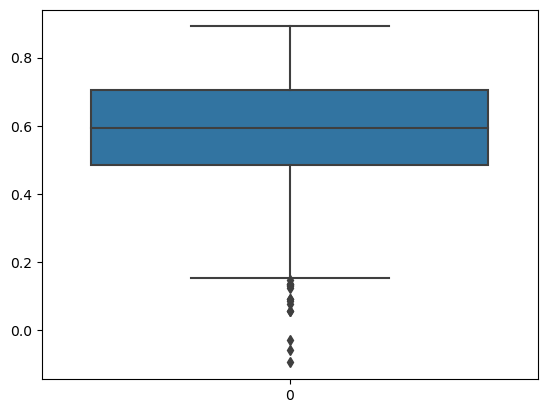

In [106]:
sns.boxplot(data=merged_data["feature_1"])

<Axes: >

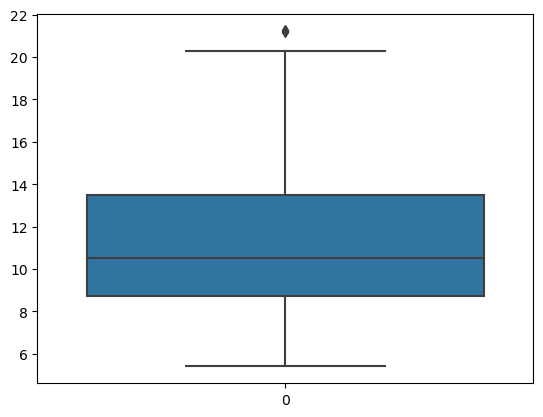

In [107]:
sns.boxplot(data=merged_data["age"])

In [108]:
merged_data.columns

Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       ...
       'bmi', 'ethnicity', 'race', 'handedness', 'parent_1_education',
       'parent_2_education', 'p_factor_fs', 'internalizing_fs',
       'externalizing_fs', 'attention_fs'],
      dtype='object', length=19915)

In [109]:
# Q1 = merged_data['age'].quantile(0.25)
# Q3 = merged_data['age'].quantile(0.75)
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")


In [110]:
# filtered_data = merged_data[
#     (merged_data['age'] >= 1.6075) & (merged_data['age'] <= 20.5875)
# ]
# print(f"Shape before filtering: {merged_data.shape}")
# print(f"Shape after filtering: {filtered_data.shape}")


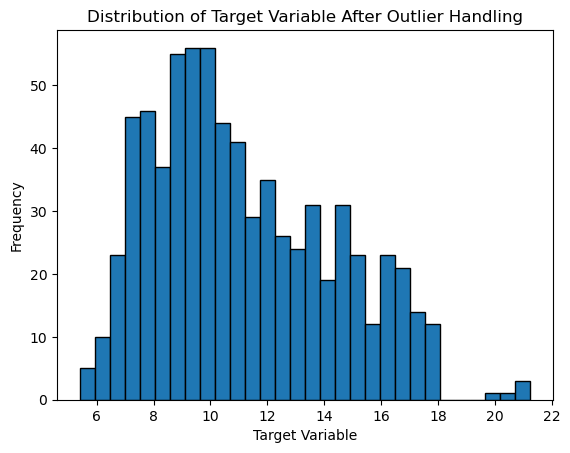

In [111]:
plt.hist(merged_data['age'], bins=30, edgecolor='black')
plt.title('Distribution of Target Variable After Outlier Handling')
plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.show()

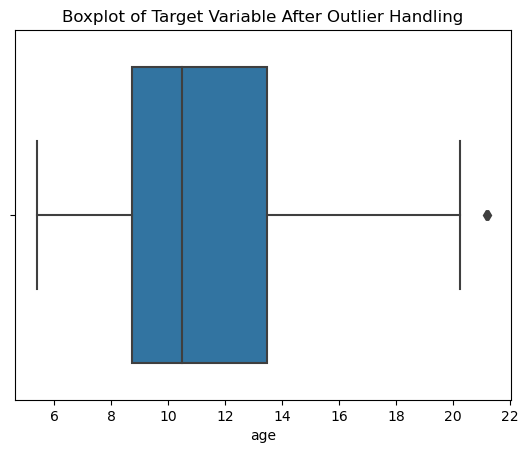

In [112]:
sns.boxplot(x=merged_data['age'])
plt.title('Boxplot of Target Variable After Outlier Handling')
plt.show()

In [113]:
merged_data['participant_id']

0       NDARAA306NT2
3       NDARAB055BPR
4       NDARAB458VK9
5       NDARAC331VEH
7       NDARAC350BZ0
            ...     
1093    NDARZU279XR3
1094    NDARZU401RCU
1095    NDARZV421TCZ
1097    NDARZV895RZ5
1099    NDARZW873DN3
Name: participant_id, Length: 723, dtype: object

In [114]:
numeric_data = merged_data.select_dtypes(include=['number'])
numeric_data

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_19896,feature_19897,feature_19898,feature_19899,age,bmi,p_factor_fs,internalizing_fs,externalizing_fs,attention_fs
0,0.542132,0.524147,0.446293,0.356702,0.739596,0.417589,0.463915,-0.059056,0.144390,0.092703,...,-0.057485,0.748110,0.142378,0.296164,21.22,30.72,1.31,1.71,-1.09,-0.68
3,0.269198,0.575656,0.116223,0.243510,0.469461,0.493588,0.704042,0.393960,0.549350,0.362526,...,0.443404,0.325009,0.402427,0.710231,10.79,26.90,0.77,-0.37,-0.57,1.40
4,0.280142,0.617829,0.715562,0.532753,0.671096,0.708990,0.543851,0.258549,0.255543,0.116425,...,0.551032,0.703349,0.533178,0.443124,12.84,15.77,-0.42,-0.55,-0.24,0.15
5,0.203130,0.433007,0.655580,0.685277,0.667523,0.668772,0.427946,0.124174,0.158637,0.162900,...,0.593955,0.394280,0.372838,0.578079,14.17,16.02,1.20,-1.47,-0.48,-0.58
7,-0.059902,0.635214,0.053475,0.350553,0.677248,0.428800,0.645720,0.347821,0.588368,0.455670,...,0.465522,0.442463,0.504747,0.496090,12.92,17.78,0.99,0.03,-0.28,-1.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,0.229579,0.600617,0.368765,0.365199,0.611657,0.620640,0.539612,0.299367,0.344594,0.220920,...,0.211891,0.279364,0.135424,0.647614,15.83,22.83,-1.10,1.23,-0.51,0.61
1094,0.127811,0.292289,0.389060,0.593261,0.553002,0.453138,0.391243,0.346273,0.310240,0.423172,...,0.260873,0.554473,0.480484,0.439120,17.66,31.92,-1.11,0.19,-0.50,-0.68
1095,-0.084592,0.623596,0.441824,0.645202,0.786968,0.691674,0.654924,0.273136,0.625980,0.451696,...,0.402284,0.635481,0.399322,0.468749,11.97,17.65,0.41,-1.77,1.81,-0.28
1097,-0.216297,0.421727,0.274872,0.275829,0.506188,0.477437,0.614731,-0.047517,0.597256,0.435380,...,0.413545,0.543575,0.629435,0.470762,10.35,16.04,-0.18,1.93,-0.43,-1.25


In [115]:
numeric_columns = merged_data.select_dtypes(include=['number']).columns
numeric_columns

Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       ...
       'feature_19896', 'feature_19897', 'feature_19898', 'feature_19899',
       'age', 'bmi', 'p_factor_fs', 'internalizing_fs', 'externalizing_fs',
       'attention_fs'],
      dtype='object', length=19906)

In [116]:
merged_data.head(10)

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,bmi,ethnicity,race,handedness,parent_1_education,parent_2_education,p_factor_fs,internalizing_fs,externalizing_fs,attention_fs
0,0.542132,0.524147,0.446293,0.356702,0.739596,0.417589,0.463915,-0.059056,0.144390,0.092703,...,30.72,Not_Hispanic_or_Latino,Other,Right,Complete_secondary,Complete_tertiary,1.31,1.71,-1.09,-0.68
3,0.269198,0.575656,0.116223,0.243510,0.469461,0.493588,0.704042,0.393960,0.549350,0.362526,...,26.90,Not_Hispanic_or_Latino,Black,Right,Complete_primary,Complete_tertiary,0.77,-0.37,-0.57,1.40
4,0.280142,0.617829,0.715562,0.532753,0.671096,0.708990,0.543851,0.258549,0.255543,0.116425,...,15.77,Hispanic_or_Latino,White,Right,Complete_secondary,Complete_secondary,-0.42,-0.55,-0.24,0.15
5,0.203130,0.433007,0.655580,0.685277,0.667523,0.668772,0.427946,0.124174,0.158637,0.162900,...,16.02,Not_Hispanic_or_Latino,White,Right,Complete_tertiary,Complete_tertiary,1.20,-1.47,-0.48,-0.58
7,-0.059902,0.635214,0.053475,0.350553,0.677248,0.428800,0.645720,0.347821,0.588368,0.455670,...,17.78,Not_Hispanic_or_Latino,White,Right,Complete_secondary,Complete_tertiary,0.99,0.03,-0.28,-1.37
11,-0.064635,0.771837,0.590197,0.650823,0.819548,0.708822,0.747803,0.227403,0.767111,0.604733,...,23.27,Hispanic_or_Latino,Other,Right,Complete_primary,Complete_primary,0.24,0.54,-1.32,0.27
13,0.132895,0.653146,0.508590,0.669615,0.690359,0.711476,0.457150,0.074936,0.469404,0.332546,...,14.06,Not_Hispanic_or_Latino,White,Right,Complete_secondary,Complete_tertiary,1.17,0.55,1.69,1.16
15,-0.084328,0.491822,0.183039,0.280830,0.443476,0.396571,0.414224,0.319839,0.249412,0.112169,...,15.89,Not_Hispanic_or_Latino,White,Left,Complete_tertiary,Complete_primary,0.52,-0.92,1.47,-0.36
16,-0.199475,0.616574,0.289781,0.596938,0.840379,0.766353,0.800716,0.422494,0.741717,0.725677,...,20.85,Hispanic_or_Latino,Asian,Right,Complete_primary,Complete_tertiary,-0.17,-1.43,-0.39,-0.28
17,0.205575,0.693050,0.664940,0.521505,0.692406,0.519682,0.368412,0.198990,0.355218,0.139972,...,26.60,Not_Hispanic_or_Latino,White,Right,Complete_tertiary,Complete_tertiary,1.62,1.59,-0.87,-2.60


In [117]:
numeric_data

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_19896,feature_19897,feature_19898,feature_19899,age,bmi,p_factor_fs,internalizing_fs,externalizing_fs,attention_fs
0,0.542132,0.524147,0.446293,0.356702,0.739596,0.417589,0.463915,-0.059056,0.144390,0.092703,...,-0.057485,0.748110,0.142378,0.296164,21.22,30.72,1.31,1.71,-1.09,-0.68
3,0.269198,0.575656,0.116223,0.243510,0.469461,0.493588,0.704042,0.393960,0.549350,0.362526,...,0.443404,0.325009,0.402427,0.710231,10.79,26.90,0.77,-0.37,-0.57,1.40
4,0.280142,0.617829,0.715562,0.532753,0.671096,0.708990,0.543851,0.258549,0.255543,0.116425,...,0.551032,0.703349,0.533178,0.443124,12.84,15.77,-0.42,-0.55,-0.24,0.15
5,0.203130,0.433007,0.655580,0.685277,0.667523,0.668772,0.427946,0.124174,0.158637,0.162900,...,0.593955,0.394280,0.372838,0.578079,14.17,16.02,1.20,-1.47,-0.48,-0.58
7,-0.059902,0.635214,0.053475,0.350553,0.677248,0.428800,0.645720,0.347821,0.588368,0.455670,...,0.465522,0.442463,0.504747,0.496090,12.92,17.78,0.99,0.03,-0.28,-1.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,0.229579,0.600617,0.368765,0.365199,0.611657,0.620640,0.539612,0.299367,0.344594,0.220920,...,0.211891,0.279364,0.135424,0.647614,15.83,22.83,-1.10,1.23,-0.51,0.61
1094,0.127811,0.292289,0.389060,0.593261,0.553002,0.453138,0.391243,0.346273,0.310240,0.423172,...,0.260873,0.554473,0.480484,0.439120,17.66,31.92,-1.11,0.19,-0.50,-0.68
1095,-0.084592,0.623596,0.441824,0.645202,0.786968,0.691674,0.654924,0.273136,0.625980,0.451696,...,0.402284,0.635481,0.399322,0.468749,11.97,17.65,0.41,-1.77,1.81,-0.28
1097,-0.216297,0.421727,0.274872,0.275829,0.506188,0.477437,0.614731,-0.047517,0.597256,0.435380,...,0.413545,0.543575,0.629435,0.470762,10.35,16.04,-0.18,1.93,-0.43,-1.25


In [118]:
Q1 = merged_data['age'].quantile(0.25)
Q3 = merged_data['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")


Lower Bound: 1.6075000000000026, Upper Bound: 20.5875


In [119]:
filtered_data = merged_data[
    (merged_data['age'] >= 1.6075) & (merged_data['age'] <= 20.5875)
]
print(f"Shape before filtering: {merged_data.shape}")
print(f"Shape after filtering: {filtered_data.shape}")


Shape before filtering: (723, 19915)
Shape after filtering: (720, 19915)


In [120]:
filtered_data.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,bmi,ethnicity,race,handedness,parent_1_education,parent_2_education,p_factor_fs,internalizing_fs,externalizing_fs,attention_fs
3,0.269198,0.575656,0.116223,0.243510,0.469461,0.493588,0.704042,0.393960,0.549350,0.362526,...,26.90,Not_Hispanic_or_Latino,Black,Right,Complete_primary,Complete_tertiary,0.77,-0.37,-0.57,1.40
4,0.280142,0.617829,0.715562,0.532753,0.671096,0.708990,0.543851,0.258549,0.255543,0.116425,...,15.77,Hispanic_or_Latino,White,Right,Complete_secondary,Complete_secondary,-0.42,-0.55,-0.24,0.15
5,0.203130,0.433007,0.655580,0.685277,0.667523,0.668772,0.427946,0.124174,0.158637,0.162900,...,16.02,Not_Hispanic_or_Latino,White,Right,Complete_tertiary,Complete_tertiary,1.20,-1.47,-0.48,-0.58
7,-0.059902,0.635214,0.053475,0.350553,0.677248,0.428800,0.645720,0.347821,0.588368,0.455670,...,17.78,Not_Hispanic_or_Latino,White,Right,Complete_secondary,Complete_tertiary,0.99,0.03,-0.28,-1.37
11,-0.064635,0.771837,0.590197,0.650823,0.819548,0.708822,0.747803,0.227403,0.767111,0.604733,...,23.27,Hispanic_or_Latino,Other,Right,Complete_primary,Complete_primary,0.24,0.54,-1.32,0.27


In [121]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

cat_cols = filtered_data.select_dtypes(include=['object', 'category']).columns.tolist()


df_categorical = filtered_data[cat_cols].copy()

# Encode categorical variables
encoded_data = pd.DataFrame()
for col in df_categorical.columns:
    if df_categorical[col].nunique() > 10:
        
        # One-Hot Encoding for high-cardinality features
        temp = pd.get_dummies(df_categorical[col], prefix=col)
        encoded_data = pd.concat([encoded_data, temp], axis=1)
    else:
        # Label Encoding for low-cardinality features
        le = LabelEncoder()
        df_categorical[col] = le.fit_transform(df_categorical[col])
        encoded_data[col] = df_categorical[col]


In [122]:
df_categorical.head()

,file_name,participant_id,sex,study_site,ethnicity,race,handedness,parent_1_education,parent_2_education
3,sub-NDARAB055BPR_ses-HBNsiteRU_task-rest_run-1...,NDARAB055BPR,0,2,1,1,2,0,2
4,sub-NDARAB458VK9_ses-HBNsiteCBIC_task-rest_run...,NDARAB458VK9,1,0,0,3,2,1,1
5,sub-NDARAC331VEH_ses-HBNsiteCBIC_task-rest_run...,NDARAC331VEH,1,0,1,3,2,2,2
7,sub-NDARAC350BZ0_ses-HBNsiteCBIC_task-rest_run...,NDARAC350BZ0,1,0,1,3,2,1,2
11,sub-NDARAD481FXF_ses-HBNsiteSI_task-rest_atlas...,NDARAD481FXF,1,3,0,2,2,0,0


In [123]:
print(filtered_data[['file_name', 'participant_id']].dtypes)

file_name         object
participant_id    object
dtype: object


In [124]:
print(df_categorical["file_name"].nunique())
print(df_categorical["participant_id"].nunique())

720
720


In [125]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Label Encoding to 'file_name' and 'participant_id'
df_categorical['file_name'] = le.fit_transform(df_categorical['file_name'])
df_categorical['participant_id'] = le.fit_transform(df_categorical['participant_id'])

encoded_final_data = df_categorical.copy()

print(encoded_final_data[['file_name', 'participant_id']].head())


    file_name  participant_id
3           0               0
4           1               1
5           2               2
7           3               3
11          4               4


In [126]:
encoded_final_data

,file_name,participant_id,sex,study_site,ethnicity,race,handedness,parent_1_education,parent_2_education
3,0,0,0,2,1,1,2,0,2
4,1,1,1,0,0,3,2,1,1
5,2,2,1,0,1,3,2,2,2
7,3,3,1,0,1,3,2,1,2
11,4,4,1,3,0,2,2,0,0
...,...,...,...,...,...,...,...,...,...
1093,715,715,0,0,1,1,2,2,2
1094,716,716,0,0,0,1,2,1,1
1095,717,717,1,0,1,2,2,2,2
1097,718,718,1,2,1,3,2,2,2


In [127]:
df_numeric = filtered_data.select_dtypes(include=['number'])
df_numeric

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_19896,feature_19897,feature_19898,feature_19899,age,bmi,p_factor_fs,internalizing_fs,externalizing_fs,attention_fs
3,0.269198,0.575656,0.116223,0.243510,0.469461,0.493588,0.704042,0.393960,0.549350,0.362526,...,0.443404,0.325009,0.402427,0.710231,10.79,26.90,0.77,-0.37,-0.57,1.40
4,0.280142,0.617829,0.715562,0.532753,0.671096,0.708990,0.543851,0.258549,0.255543,0.116425,...,0.551032,0.703349,0.533178,0.443124,12.84,15.77,-0.42,-0.55,-0.24,0.15
5,0.203130,0.433007,0.655580,0.685277,0.667523,0.668772,0.427946,0.124174,0.158637,0.162900,...,0.593955,0.394280,0.372838,0.578079,14.17,16.02,1.20,-1.47,-0.48,-0.58
7,-0.059902,0.635214,0.053475,0.350553,0.677248,0.428800,0.645720,0.347821,0.588368,0.455670,...,0.465522,0.442463,0.504747,0.496090,12.92,17.78,0.99,0.03,-0.28,-1.37
11,-0.064635,0.771837,0.590197,0.650823,0.819548,0.708822,0.747803,0.227403,0.767111,0.604733,...,0.376339,0.727630,0.597149,0.697795,16.45,23.27,0.24,0.54,-1.32,0.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,0.229579,0.600617,0.368765,0.365199,0.611657,0.620640,0.539612,0.299367,0.344594,0.220920,...,0.211891,0.279364,0.135424,0.647614,15.83,22.83,-1.10,1.23,-0.51,0.61
1094,0.127811,0.292289,0.389060,0.593261,0.553002,0.453138,0.391243,0.346273,0.310240,0.423172,...,0.260873,0.554473,0.480484,0.439120,17.66,31.92,-1.11,0.19,-0.50,-0.68
1095,-0.084592,0.623596,0.441824,0.645202,0.786968,0.691674,0.654924,0.273136,0.625980,0.451696,...,0.402284,0.635481,0.399322,0.468749,11.97,17.65,0.41,-1.77,1.81,-0.28
1097,-0.216297,0.421727,0.274872,0.275829,0.506188,0.477437,0.614731,-0.047517,0.597256,0.435380,...,0.413545,0.543575,0.629435,0.470762,10.35,16.04,-0.18,1.93,-0.43,-1.25


In [128]:
df_final = pd.concat([df_numeric, encoded_final_data], axis=1)
df_final.dropna(inplace=True)  


In [129]:
df_final.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,attention_fs,file_name,participant_id,sex,study_site,ethnicity,race,handedness,parent_1_education,parent_2_education
3,0.269198,0.575656,0.116223,0.243510,0.469461,0.493588,0.704042,0.393960,0.549350,0.362526,...,1.40,0,0,0,2,1,1,2,0,2
4,0.280142,0.617829,0.715562,0.532753,0.671096,0.708990,0.543851,0.258549,0.255543,0.116425,...,0.15,1,1,1,0,0,3,2,1,1
5,0.203130,0.433007,0.655580,0.685277,0.667523,0.668772,0.427946,0.124174,0.158637,0.162900,...,-0.58,2,2,1,0,1,3,2,2,2
7,-0.059902,0.635214,0.053475,0.350553,0.677248,0.428800,0.645720,0.347821,0.588368,0.455670,...,-1.37,3,3,1,0,1,3,2,1,2
11,-0.064635,0.771837,0.590197,0.650823,0.819548,0.708822,0.747803,0.227403,0.767111,0.604733,...,0.27,4,4,1,3,0,2,2,0,0


In [130]:
df_final.duplicated().sum()

0

In [131]:
df_final.isnull().sum()

feature_0             0
feature_1             0
feature_2             0
feature_3             0
feature_4             0
                     ..
ethnicity             0
race                  0
handedness            0
parent_1_education    0
parent_2_education    0
Length: 19915, dtype: int64

In [132]:
df_final.shape

(720, 19915)

In [133]:
target_column = 'age'  
X = df_final.drop(columns=[target_column])
y = df_final[target_column]

In [136]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Train a Random Forest model to get feature importance (for regression)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importance scores
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Select top 50 important features 
top_features = feature_importance.head(50)['Feature'].values
X_selected = X[top_features]

In [137]:
X_selected

,bmi,feature_12830,feature_7287,feature_13638,feature_13635,feature_13636,feature_7069,feature_10435,feature_7061,feature_7436,...,feature_16950,feature_2616,feature_7220,feature_10807,feature_12102,feature_11178,feature_8462,feature_13296,feature_13746,feature_11305
3,26.90,0.018083,0.225078,0.379476,0.220569,0.547997,0.097514,0.467306,-0.018479,-0.142906,...,0.060640,0.155956,0.333349,0.209338,0.167504,0.344262,0.461796,0.285117,0.154171,0.183852
4,15.77,0.302286,-0.045650,-0.133525,0.064548,0.145247,0.138183,0.290266,0.249465,-0.056131,...,-0.465534,-0.239109,0.180169,0.046518,0.088456,-0.029033,-0.266169,-0.294304,0.228265,-0.478675
5,16.02,-0.394922,0.426271,-0.512666,-0.558467,-0.181213,-0.449998,-0.176730,0.053227,0.448100,...,0.126213,0.266843,0.113275,-0.294640,-0.555906,0.056211,-0.299828,-0.474241,-0.429979,-0.176339
7,17.78,-0.366723,0.128668,-0.183379,-0.307340,-0.101722,-0.080804,-0.197045,-0.239866,0.198276,...,-0.176457,0.213369,-0.054600,-0.256963,-0.272953,-0.119299,-0.200530,-0.305745,-0.331184,-0.185309
11,23.27,-0.061795,0.225310,-0.372490,-0.113138,0.003271,-0.104570,-0.120754,-0.343988,-0.092929,...,0.021139,0.037233,0.080974,-0.215076,-0.113505,-0.139396,-0.279753,-0.116054,-0.234213,-0.270498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,22.83,0.246672,0.102786,-0.217245,-0.088192,0.136696,0.132883,0.223601,0.066524,-0.042717,...,-0.277567,0.499665,0.272779,-0.128703,-0.066965,-0.212251,-0.124744,-0.374586,-0.038792,-0.199454
1094,31.92,-0.326093,0.143356,-0.222047,-0.487118,-0.107838,-0.418690,-0.535237,-0.439197,0.247145,...,-0.467571,0.300440,-0.240234,-0.171208,0.006453,0.343570,-0.172509,-0.464981,-0.406840,-0.240022
1095,17.65,-0.427672,0.310052,-0.465914,-0.305198,-0.052626,-0.270416,-0.269339,-0.195759,0.321654,...,-0.244272,-0.126440,-0.226718,-0.171484,-0.402993,-0.037079,-0.345332,-0.365994,-0.353571,-0.391207
1097,16.04,0.653884,0.311946,0.298149,0.708334,0.648972,0.088927,0.749664,-0.132693,0.105312,...,-0.115174,0.124905,0.602010,0.063077,-0.236266,-0.019990,0.416968,-0.156394,0.272166,-0.095328


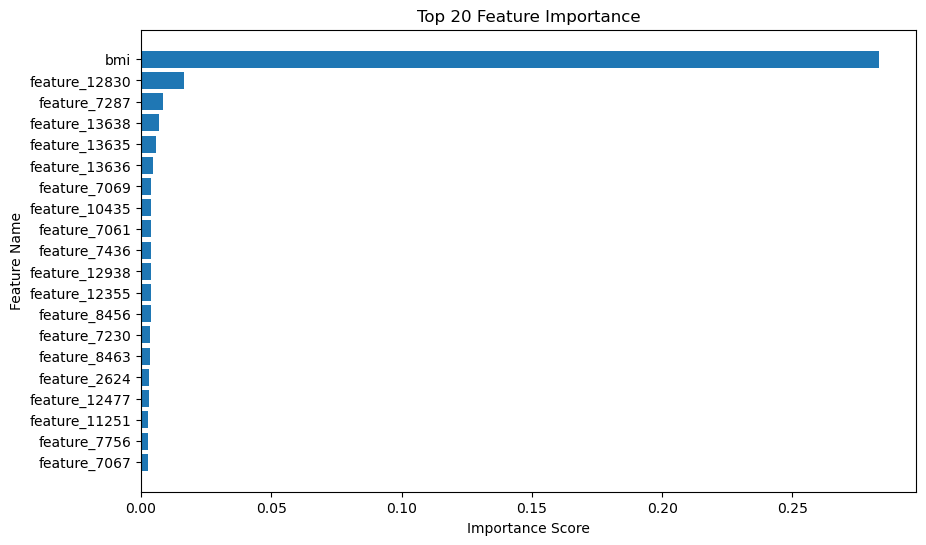

In [138]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'][:20], feature_importance['Importance'][:20])
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')
plt.title('Top 20 Feature Importance')
plt.gca().invert_yaxis()
plt.show()

In [139]:

# correlation matrix
corr_matrix = X_selected.corr().abs()

# Identify highly correlated features (correlation > 0.85)
high_corr_var = np.where(corr_matrix > 0.85)
high_corr_var = [(corr_matrix.index[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_var) if x != y]

# Convert to a set of unique feature pairs
correlated_features = set([i[0] for i in high_corr_var])

print(f"Highly correlated features to drop: {correlated_features}")

# Drop one feature from each highly correlated pair
X_selected = X_selected.drop(columns=correlated_features)


Highly correlated features to drop: set()


In [140]:
X_selected

,bmi,feature_12830,feature_7287,feature_13638,feature_13635,feature_13636,feature_7069,feature_10435,feature_7061,feature_7436,...,feature_16950,feature_2616,feature_7220,feature_10807,feature_12102,feature_11178,feature_8462,feature_13296,feature_13746,feature_11305
3,26.90,0.018083,0.225078,0.379476,0.220569,0.547997,0.097514,0.467306,-0.018479,-0.142906,...,0.060640,0.155956,0.333349,0.209338,0.167504,0.344262,0.461796,0.285117,0.154171,0.183852
4,15.77,0.302286,-0.045650,-0.133525,0.064548,0.145247,0.138183,0.290266,0.249465,-0.056131,...,-0.465534,-0.239109,0.180169,0.046518,0.088456,-0.029033,-0.266169,-0.294304,0.228265,-0.478675
5,16.02,-0.394922,0.426271,-0.512666,-0.558467,-0.181213,-0.449998,-0.176730,0.053227,0.448100,...,0.126213,0.266843,0.113275,-0.294640,-0.555906,0.056211,-0.299828,-0.474241,-0.429979,-0.176339
7,17.78,-0.366723,0.128668,-0.183379,-0.307340,-0.101722,-0.080804,-0.197045,-0.239866,0.198276,...,-0.176457,0.213369,-0.054600,-0.256963,-0.272953,-0.119299,-0.200530,-0.305745,-0.331184,-0.185309
11,23.27,-0.061795,0.225310,-0.372490,-0.113138,0.003271,-0.104570,-0.120754,-0.343988,-0.092929,...,0.021139,0.037233,0.080974,-0.215076,-0.113505,-0.139396,-0.279753,-0.116054,-0.234213,-0.270498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,22.83,0.246672,0.102786,-0.217245,-0.088192,0.136696,0.132883,0.223601,0.066524,-0.042717,...,-0.277567,0.499665,0.272779,-0.128703,-0.066965,-0.212251,-0.124744,-0.374586,-0.038792,-0.199454
1094,31.92,-0.326093,0.143356,-0.222047,-0.487118,-0.107838,-0.418690,-0.535237,-0.439197,0.247145,...,-0.467571,0.300440,-0.240234,-0.171208,0.006453,0.343570,-0.172509,-0.464981,-0.406840,-0.240022
1095,17.65,-0.427672,0.310052,-0.465914,-0.305198,-0.052626,-0.270416,-0.269339,-0.195759,0.321654,...,-0.244272,-0.126440,-0.226718,-0.171484,-0.402993,-0.037079,-0.345332,-0.365994,-0.353571,-0.391207
1097,16.04,0.653884,0.311946,0.298149,0.708334,0.648972,0.088927,0.749664,-0.132693,0.105312,...,-0.115174,0.124905,0.602010,0.063077,-0.236266,-0.019990,0.416968,-0.156394,0.272166,-0.095328


In [141]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor  

# Initialize the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Apply RFE to select the top 20 features 
rfe = RFE(rf, n_features_to_select=20)
X_rfe = rfe.fit_transform(X_selected, y)

# Get selected feature names
selected_features = X_selected.columns[rfe.support_]
print(f"Final selected features: {list(selected_features)}")

# Keep only selected features
X_selected = X_selected[selected_features]


Final selected features: ['bmi', 'feature_12830', 'feature_7287', 'feature_13638', 'feature_13635', 'feature_13636', 'feature_7061', 'feature_7436', 'feature_12355', 'feature_8456', 'feature_7230', 'feature_2624', 'feature_7756', 'feature_18015', 'feature_3358', 'feature_10457', 'feature_13279', 'feature_16669', 'feature_16950', 'feature_11178']


In [142]:
X_selected.head()

,bmi,feature_12830,feature_7287,feature_13638,feature_13635,feature_13636,feature_7061,feature_7436,feature_12355,feature_8456,feature_7230,feature_2624,feature_7756,feature_18015,feature_3358,feature_10457,feature_13279,feature_16669,feature_16950,feature_11178
3,26.90,0.018083,0.225078,0.379476,0.220569,0.547997,-0.018479,-0.142906,0.127436,0.593643,0.396259,0.127068,0.181628,-0.153438,-0.023874,0.140178,-0.051156,-0.086770,0.060640,0.344262
4,15.77,0.302286,-0.045650,-0.133525,0.064548,0.145247,0.249465,-0.056131,0.264293,0.171341,0.328551,-0.025090,0.406745,-0.262642,-0.192604,-0.172223,-0.568035,-0.035716,-0.465534,-0.029033
5,16.02,-0.394922,0.426271,-0.512666,-0.558467,-0.181213,0.053227,0.448100,0.450235,-0.178188,-0.308584,0.392982,0.511611,0.233265,0.259482,-0.233764,-0.365791,-0.051995,0.126213,0.056211
7,17.78,-0.366723,0.128668,-0.183379,-0.307340,-0.101722,-0.239866,0.198276,0.500560,-0.156247,0.027432,0.242142,0.471989,0.115289,-0.028577,0.062975,-0.332955,-0.268184,-0.176457,-0.119299
11,23.27,-0.061795,0.225310,-0.372490,-0.113138,0.003271,-0.343988,-0.092929,0.520013,-0.107934,0.186393,0.171143,0.235831,-0.044571,0.224109,-0.047157,-0.226281,0.034907,0.021139,-0.139396


In [143]:
X_selected.columns

Index(['bmi', 'feature_12830', 'feature_7287', 'feature_13638',
       'feature_13635', 'feature_13636', 'feature_7061', 'feature_7436',
       'feature_12355', 'feature_8456', 'feature_7230', 'feature_2624',
       'feature_7756', 'feature_18015', 'feature_3358', 'feature_10457',
       'feature_13279', 'feature_16669', 'feature_16950', 'feature_11178'],
      dtype='object')

In [144]:
y.head()

3     10.79
4     12.84
5     14.17
7     12.92
11    16.45
Name: age, dtype: float64

In [145]:
X_selected.isnull().sum()

bmi              0
feature_12830    0
feature_7287     0
feature_13638    0
feature_13635    0
feature_13636    0
feature_7061     0
feature_7436     0
feature_12355    0
feature_8456     0
feature_7230     0
feature_2624     0
feature_7756     0
feature_18015    0
feature_3358     0
feature_10457    0
feature_13279    0
feature_16669    0
feature_16950    0
feature_11178    0
dtype: int64

In [146]:
X_selected.duplicated().sum()

0

In [147]:
y.dtypes

dtype('float64')

In [148]:
y = y.round().astype(int)  

In [149]:
y.dtypes

dtype('int32')

In [150]:
y.head()

3     11
4     13
5     14
7     13
11    16
Name: age, dtype: int32

In [151]:

# # Select a few key features to plot
# top_features = X.columns[:5]  # First 5 features

# # Scatterplot for each feature vs. age
# fig, axes = plt.subplots(1, 5, figsize=(20, 4))
# for i, feature in enumerate(top_features):
#     axes[i].scatter(X[feature], y, alpha=0.5)
#     axes[i].set_title(f"{feature} vs Age")
#     axes[i].set_xlabel(feature)
#     axes[i].set_ylabel("Age")

# plt.tight_layout()
# plt.show()


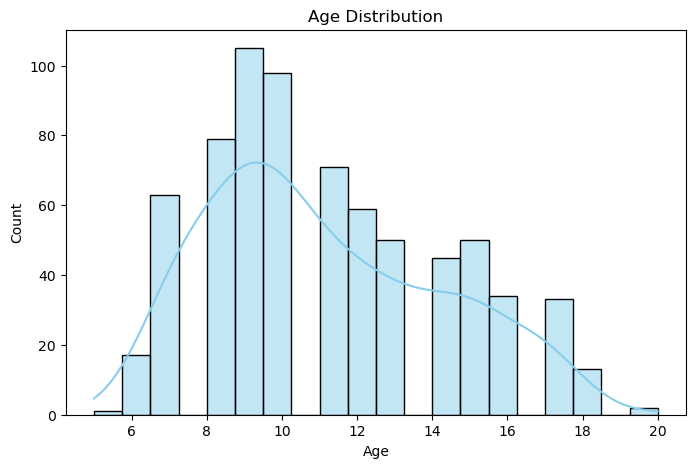

In [154]:
plt.figure(figsize=(8, 5))
sns.histplot(y, bins=20, kde=True, color='skyblue')
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution")
plt.show()


In [155]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")


Training set: (576, 20), Test set: (144, 20)


In [156]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)


In [157]:
y_pred

array([14.93, 10.31, 12.96,  8.23, 10.83, 11.78,  9.68, 14.97, 15.01,
       10.34,  9.55, 14.59,  8.74, 12.08,  9.81, 12.59, 12.07, 10.01,
       12.04, 13.51, 13.91,  9.47,  8.63,  8.98, 12.51, 15.14, 14.07,
        9.72,  9.42, 11.25,  9.25,  8.67, 10.48, 10.17, 13.95, 12.54,
       15.2 , 10.41,  8.23,  8.05, 11.14, 13.29,  9.93, 12.18,  8.98,
       10.4 , 14.46,  8.02, 11.69, 11.21, 10.69,  8.95, 10.39, 10.56,
       10.8 ,  7.3 , 14.54,  9.5 ,  9.74, 13.13, 13.37,  8.66, 12.6 ,
       13.08, 10.11,  9.58, 11.42, 12.83, 10.28, 14.49,  8.51,  8.71,
       11.26, 14.85,  7.23, 11.18, 11.23,  9.07, 15.4 ,  7.46, 12.81,
        9.04, 14.95, 11.25,  8.88, 11.95,  9.59, 14.97, 11.25,  9.6 ,
       14.64, 12.01, 12.04, 10.96,  8.41,  8.14,  7.69, 12.23, 12.87,
       10.55, 12.77, 12.99,  9.95,  9.35,  7.64,  8.84,  8.97, 13.57,
       10.23, 13.45,  8.51, 12.65,  9.48, 10.24,  8.78,  9.07, 14.1 ,
       11.1 ,  9.6 , 10.39, 10.92, 11.59, 11.67, 12.88, 12.19,  9.05,
       12.81, 11.85,

In [158]:
y

3       11
4       13
5       14
7       13
11      16
        ..
1093    16
1094    18
1095    12
1097    10
1099    13
Name: age, Length: 720, dtype: int32

In [159]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Compute metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"📊 Model Performance:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


📊 Model Performance:
MAE: 1.76
RMSE: 2.31
R² Score: 0.48


In [160]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],   # Number of trees
    'max_depth': [10, 20, None],       # Tree depth (None means unlimited)
    'min_samples_split': [2, 5, 10],   # Min samples required to split a node
    'min_samples_leaf': [1, 2, 4]      # Min samples at leaf node
}

# Initialize model
rf = RandomForestRegressor(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2)

# Train the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"✅ Best Parameters: {best_params}")


Fitting 3 folds for each of 81 candidates, totalling 243 fits
✅ Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [161]:
# Train the final model with best parameters
best_rf = RandomForestRegressor(
    n_estimators=200, 
    max_depth=None, 
    min_samples_leaf=1, 
    min_samples_split=2, 
    random_state=42
)
best_rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_best = best_rf.predict(X_test)


In [162]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Compute evaluation metrics
mae = mean_absolute_error(y_test, y_pred_best)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2 = r2_score(y_test, y_pred_best)

print(f" Final Model Performance:")
print(f"MAE (Mean Absolute Error): {mae:.2f}")
print(f" RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f" R² Score: {r2:.2f}")


 Final Model Performance:
MAE (Mean Absolute Error): 1.73
 RMSE (Root Mean Squared Error): 2.29
 R² Score: 0.49


In [166]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/70/58/2f94976df39470fb00eec2cb4f914dde44cd0df8d96483208bf7db4bc97e/xgboost-2.1.3-py3-none-win_amd64.whl.metadata
  Using cached xgboost-2.1.3-py3-none-win_amd64.whl.metadata (2.1 kB)
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ------------

   ---------------------------------------- 0.5/124.9 MB 39.2 kB/s eta 0:52:55
   ---------------------------------------- 0.5/124.9 MB 39.2 kB/s eta 0:52:55
   ---------------------------------------- 0.5/124.9 MB 39.2 kB/s eta 0:52:55
   ---------------------------------------- 0.5/124.9 MB 39.2 kB/s eta 0:52:55
   ---------------------------------------- 0.5/124.9 MB 39.2 kB/s eta 0:52:55
   ---------------------------------------- 0.5/124.9 MB 39.2 kB/s eta 0:52:55
   ---------------------------------------- 0.5/124.9 MB 39.2 kB/s eta 0:52:55
   ---------------------------------------- 0.5/124.9 MB 39.2 kB/s eta 0:52:55
   ---------------------------------------- 0.5/124.9 MB 39.2 kB/s eta 0:52:55
   ---------------------------------------- 0.5/124.9 MB 39.2 kB/s eta 0:52:55
   ---------------------------------------- 0.5/124.9 MB 39.2 kB/s eta 0:52:55
   ---------------------------------------- 0.5/124.9 MB 39.2 kB/s eta 0:52:55
   ---------------------------------------- 0.5/124.

   -------------- ------------------------ 45.7/124.9 MB 265.4 kB/s eta 0:04:59
   -------------- ------------------------ 45.7/124.9 MB 265.4 kB/s eta 0:04:59
   -------------- ------------------------ 45.8/124.9 MB 265.5 kB/s eta 0:04:59
   -------------- ------------------------ 45.8/124.9 MB 265.5 kB/s eta 0:04:59
   -------------- ------------------------ 45.8/124.9 MB 265.4 kB/s eta 0:04:59
   -------------- ------------------------ 45.8/124.9 MB 265.9 kB/s eta 0:04:58
   -------------- ------------------------ 45.9/124.9 MB 267.0 kB/s eta 0:04:57
   -------------- ------------------------ 45.9/124.9 MB 267.2 kB/s eta 0:04:56
   -------------- ------------------------ 45.9/124.9 MB 267.4 kB/s eta 0:04:56
   -------------- ------------------------ 45.9/124.9 MB 268.0 kB/s eta 0:04:55
   -------------- ------------------------ 45.9/124.9 MB 268.0 kB/s eta 0:04:55
   -------------- ------------------------ 45.9/124.9 MB 268.0 kB/s eta 0:04:55
   -------------- ----------------------

   ------------------------- ------------- 83.3/124.9 MB 241.0 kB/s eta 0:02:53
   -------------------------- ------------ 83.3/124.9 MB 241.0 kB/s eta 0:02:53
   -------------------------- ------------ 83.3/124.9 MB 242.5 kB/s eta 0:02:52
   -------------------------- ------------ 83.3/124.9 MB 242.5 kB/s eta 0:02:52
   -------------------------- ------------ 83.3/124.9 MB 242.5 kB/s eta 0:02:52
   -------------------------- ------------ 83.3/124.9 MB 242.5 kB/s eta 0:02:52
   -------------------------- ------------ 83.3/124.9 MB 242.5 kB/s eta 0:02:52
   -------------------------- ------------ 83.3/124.9 MB 242.5 kB/s eta 0:02:52
   -------------------------- ------------ 83.3/124.9 MB 242.5 kB/s eta 0:02:52
   -------------------------- ------------ 83.3/124.9 MB 242.5 kB/s eta 0:02:52
   -------------------------- ------------ 83.3/124.9 MB 242.5 kB/s eta 0:02:52
   -------------------------- ------------ 83.3/124.9 MB 242.5 kB/s eta 0:02:52
   -------------------------- ----------

   ---------------------------- ---------- 92.3/124.9 MB 196.3 kB/s eta 0:02:47
   ---------------------------- ---------- 92.3/124.9 MB 196.6 kB/s eta 0:02:46
   ---------------------------- ---------- 92.3/124.9 MB 196.8 kB/s eta 0:02:46
   ---------------------------- ---------- 92.3/124.9 MB 196.9 kB/s eta 0:02:46
   ---------------------------- ---------- 92.4/124.9 MB 197.4 kB/s eta 0:02:45
   ---------------------------- ---------- 92.4/124.9 MB 197.6 kB/s eta 0:02:45
   ---------------------------- ---------- 92.4/124.9 MB 197.6 kB/s eta 0:02:45
   ---------------------------- ---------- 92.4/124.9 MB 197.6 kB/s eta 0:02:45
   ---------------------------- ---------- 92.4/124.9 MB 198.3 kB/s eta 0:02:44
   ---------------------------- ---------- 92.4/124.9 MB 198.3 kB/s eta 0:02:44
   ---------------------------- ---------- 92.4/124.9 MB 198.5 kB/s eta 0:02:44
   ---------------------------- ---------- 92.5/124.9 MB 198.9 kB/s eta 0:02:44
   ---------------------------- --------

In [167]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=6, random_state=42)
xgb.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb.predict(X_test)

# Evaluate XGBoost
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Performance:")
print(f"MAE: {mae_xgb:.2f}")
print(f"RMSE: {rmse_xgb:.2f}")
print(f"R² Score: {r2_xgb:.2f}")


XGBoost Performance:
MAE: 1.84
RMSE: 2.36
R² Score: 0.46


In [168]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Define the model
xgb = XGBRegressor(random_state=42)

# Define hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 6, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# Perform grid search
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

# Best parameters found by grid search
print("Best parameters found: ", grid_search.best_params_)

# Use the best estimator to make predictions
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluate the best model
mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)

print(f"Best XGBoost Performance:")
print(f"MAE: {mae_best:.2f}")
print(f"RMSE: {rmse_best:.2f}")
print(f"R² Score: {r2_best:.2f}")


Fitting 3 folds for each of 729 candidates, totalling 2187 fits
Best parameters found:  {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 0.7}
Best XGBoost Performance:
MAE: 1.72
RMSE: 2.22
R² Score: 0.52


In [169]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the parameter grid
param_dist = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'n_estimators': [100, 200, 300],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.7, 0.8],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# Initialize the XGBoost model
xgb = XGBRegressor(random_state=42)

# Apply RandomizedSearchCV
rand_search = RandomizedSearchCV(xgb, param_distributions=param_dist, n_iter=100, cv=3, random_state=42)
rand_search.fit(X_train, y_train)

# Print best parameters
print(f"Best parameters: {rand_search.best_params_}")


Best parameters: {'subsample': 0.7, 'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 1.0}


In [170]:
# Initialize XGBoost model with best parameters
best_xgb = XGBRegressor(
    learning_rate=0.05,
    max_depth=3,
    n_estimators=100,
    min_child_weight=5,
    subsample=0.7,
    colsample_bytree=1.0,
    random_state=42
)

# Train the model
best_xgb.fit(X_train, y_train)

# Make predictions
y_pred_best_xgb = best_xgb.predict(X_test)

# Evaluate the model
mae_best_xgb = mean_absolute_error(y_test, y_pred_best_xgb)
rmse_best_xgb = np.sqrt(mean_squared_error(y_test, y_pred_best_xgb))
r2_best_xgb = r2_score(y_test, y_pred_best_xgb)

# Print performance metrics
print(f"XGBoost with Best Parameters Performance:")
print(f"MAE: {mae_best_xgb:.2f}")
print(f"RMSE: {rmse_best_xgb:.2f}")
print(f"R² Score: {r2_best_xgb:.2f}")


XGBoost with Best Parameters Performance:
MAE: 1.72
RMSE: 2.22
R² Score: 0.52


In [172]:
!pip install lightgbm

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/d9/28/3be76b591a2e14a031b681b8283acf1dec2ad521f6f1701b7957df68c466/lightgbm-4.5.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 163.8 kB/s eta 0:00:09
   - -------------------------------------- 0.0/1.4 MB 151.3 kB/s eta 0:00:10
   -- ------------------------------------- 0.1/1.4 MB 269.5 kB/s eta 0:00:06
   -- ------------------------------------- 0.1/1.4 MB 275.8 kB/s eta 0:00:05
   -- ------------------------------------- 0.1/1.4 MB 275.8 kB/s eta 0:00:05
   --- ------------------------------------ 0.1/1.4 MB 234.3 kB/s eta 0:00:06
   --- ------------------------------------ 0.1/1

In [173]:
import lightgbm as lgb

lgb_model = lgb.LGBMRegressor(n_estimators=300, learning_rate=0.05, max_depth=6, random_state=42)
lgb_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_lgb = lgb_model.predict(X_test)
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
rmse_lgb = np.sqrt(mean_squared_error(y_test, y_pred_lgb))
r2_lgb = r2_score(y_test, y_pred_lgb)

print(f"LightGBM Performance:")
print(f"MAE: {mae_lgb:.2f}")
print(f"RMSE: {rmse_lgb:.2f}")
print(f"R² Score: {r2_lgb:.2f}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000286 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3846
[LightGBM] [Info] Number of data points in the train set: 576, number of used features: 20
[LightGBM] [Info] Start training from score 11.100694
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [174]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=6, random_state=42)
gb.fit(X_train, y_train)

# Predictions and evaluation
y_pred_gb = gb.predict(X_test)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting Performance:")
print(f"MAE: {mae_gb:.2f}")
print(f"RMSE: {rmse_gb:.2f}")
print(f"R² Score: {r2_gb:.2f}")


Gradient Boosting Performance:
MAE: 1.86
RMSE: 2.43
R² Score: 0.43


In [175]:
from sklearn.ensemble import StackingRegressor

# Base models
base_learners = [
    ('rf', RandomForestRegressor(n_estimators=300, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=300, random_state=42)),
    ('lgb', lgb.LGBMRegressor(n_estimators=300, random_state=42))
]

# Stacking model
stacked_model = StackingRegressor(estimators=base_learners, final_estimator=RandomForestRegressor())
stacked_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_stacked = stacked_model.predict(X_test)
mae_stacked = mean_absolute_error(y_test, y_pred_stacked)
rmse_stacked = np.sqrt(mean_squared_error(y_test, y_pred_stacked))
r2_stacked = r2_score(y_test, y_pred_stacked)

print(f"Stacked Model Performance:")
print(f"MAE: {mae_stacked:.2f}")
print(f"RMSE: {rmse_stacked:.2f}")
print(f"R² Score: {r2_stacked:.2f}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000227 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3846
[LightGBM] [Info] Number of data points in the train set: 576, number of used features: 20
[LightGBM] [Info] Start training from score 11.100694
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000232 secon

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [176]:
from sklearn.model_selection import cross_val_score

# Cross-validation with Random Forest
rf = RandomForestRegressor(n_estimators=300, random_state=42)
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print(f"Random Forest Cross-Validation MAE: {cv_scores.mean():.2f}")


Random Forest Cross-Validation MAE: -1.70


In [178]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],  # Replacing 'auto' with valid options
    'bootstrap': [True, False]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5, 
                           n_jobs=-1,
                           scoring='neg_mean_absolute_error')

# Fit the model
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best parameters found: ", grid_search.best_params_)

# Evaluate the tuned model
best_rf_model = grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate performance
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"Random Forest (Tuned) MAE: {mae_rf:.2f}")


Best parameters found:  {'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest (Tuned) MAE: 1.82


In [181]:
merged_data_test.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,bmi,ethnicity,race,handedness,parent_1_education,parent_2_education,p_factor_fs,internalizing_fs,externalizing_fs,attention_fs
0,0.524855,0.484972,0.492336,0.517045,0.468494,0.553764,0.555734,0.300393,0.395799,0.263726,...,14.86,NaN,NaN,Right,Complete_tertiary,Complete_tertiary,-1.61,-0.74,-0.31,-0.43
1,-0.303114,0.760065,0.444488,0.705790,0.827377,0.739177,0.685885,0.382692,0.629805,0.256382,...,17.84,Not_Hispanic_or_Latino,White,Right,Complete_secondary,Complete_tertiary,-0.08,-0.37,0.37,0.12
2,0.228731,0.704443,0.517845,0.388577,0.495863,0.561603,0.466160,0.134430,0.478563,0.306227,...,18.32,Not_Hispanic_or_Latino,White,Right,Complete_primary,Complete_tertiary,1.31,-1.75,-0.58,0.19
3,0.168970,0.709427,0.633803,0.533424,0.449741,0.528832,0.511939,0.275791,0.495998,-0.017472,...,16.18,Not_Hispanic_or_Latino,White,Left,Complete_tertiary,Complete_tertiary,0.03,-1.54,-0.20,1.10
4,0.071224,0.697654,0.685984,0.521219,0.621353,0.546660,0.446338,0.464537,0.481348,0.328609,...,15.97,Not_Hispanic_or_Latino,White,Right,Complete_tertiary,Complete_tertiary,0.16,0.49,0.18,-0.58


In [183]:
merged_data_test.info

<bound method DataFrame.info of      feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0     0.524855   0.484972   0.492336   0.517045   0.468494   0.553764   
1    -0.303114   0.760065   0.444488   0.705790   0.827377   0.739177   
2     0.228731   0.704443   0.517845   0.388577   0.495863   0.561603   
3     0.168970   0.709427   0.633803   0.533424   0.449741   0.528832   
4     0.071224   0.697654   0.685984   0.521219   0.621353   0.546660   
..         ...        ...        ...        ...        ...        ...   
469   0.477508   0.758649   0.558790   0.591866   0.592171   0.303225   
470   0.278205   0.674519   0.117580   0.226276   0.714429   0.443396   
471   0.248920   0.736558   0.502319   0.661320   0.730791   0.626494   
472   0.195109   0.660781   0.668380   0.690196   0.536538   0.551133   
473   0.244245   0.549262   0.260101   0.600626   0.682180   0.724233   

     feature_6  feature_7  feature_8  feature_9  ...    bmi  \
0     0.555734   0.300393   

In [185]:
merged_data_test.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_19895,feature_19896,feature_19897,feature_19898,feature_19899,bmi,p_factor_fs,internalizing_fs,externalizing_fs,attention_fs
count,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,...,474.000000,474.000000,474.000000,474.000000,474.000000,465.000000,474.000000,474.000000,474.000000,474.00000
mean,0.185794,0.591208,0.435974,0.459288,0.587865,0.559047,0.510710,0.286417,0.441586,0.259779,...,0.380706,0.376440,0.497893,0.468998,0.542080,19.628538,0.142996,0.145359,-0.035591,0.15616
std,0.248729,0.175552,0.247590,0.208236,0.192749,0.165674,0.187492,0.194297,0.200261,0.207261,...,0.192050,0.188411,0.177046,0.178731,0.174673,4.979671,0.949224,1.059885,0.996716,0.98317
min,-0.623480,-0.249972,-0.341506,-0.281426,-0.474024,-0.275429,-0.488907,-0.406715,-0.482938,-0.536665,...,-0.364601,-0.347867,-0.107875,-0.048069,-0.224057,10.320000,-1.610000,-2.170000,-1.960000,-2.60000
25%,0.014883,0.505023,0.277989,0.322951,0.486729,0.464502,0.402810,0.152452,0.336437,0.127045,...,0.274819,0.234807,0.396355,0.353532,0.437823,16.030000,-0.550000,-0.775000,-0.650000,-0.54000
50%,0.208033,0.626291,0.487616,0.495533,0.621977,0.584041,0.533645,0.289501,0.462390,0.267288,...,0.399155,0.397807,0.511329,0.483819,0.572017,18.490000,0.100000,0.100000,-0.310000,0.27000
75%,0.360179,0.718490,0.630078,0.601389,0.724203,0.680977,0.647912,0.435368,0.584411,0.402831,...,0.508869,0.512175,0.624644,0.591673,0.668171,22.080000,0.830000,1.020000,0.310000,0.90750
max,0.772694,0.875944,0.884576,0.846140,0.893974,0.857640,0.890627,0.725659,0.842483,0.694553,...,0.866371,0.816969,0.914021,0.897473,0.892060,41.550000,2.980000,2.710000,3.890000,2.26000


In [186]:
merged_data_test.dtypes

feature_0             float64
feature_1             float64
feature_2             float64
feature_3             float64
feature_4             float64
                       ...   
parent_2_education     object
p_factor_fs           float64
internalizing_fs      float64
externalizing_fs      float64
attention_fs          float64
Length: 19914, dtype: object

In [187]:
merged_data_test.columns

Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       ...
       'bmi', 'ethnicity', 'race', 'handedness', 'parent_1_education',
       'parent_2_education', 'p_factor_fs', 'internalizing_fs',
       'externalizing_fs', 'attention_fs'],
      dtype='object', length=19914)

In [188]:
merged_data_test.isnull().sum()

feature_0              0
feature_1              0
feature_2              0
feature_3              0
feature_4              0
                      ..
parent_2_education    10
p_factor_fs            0
internalizing_fs       0
externalizing_fs       0
attention_fs           0
Length: 19914, dtype: int64

In [190]:
columns_with_nulls = merged_data_test.isnull().sum()[merged_data_test.isnull().sum() > 0]
print(columns_with_nulls)


bmi                    9
ethnicity             55
race                  72
parent_1_education    84
parent_2_education    10
dtype: int64


In [191]:
merged_data_test = merged_data_test.dropna()

In [192]:
merged_data_test

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,bmi,ethnicity,race,handedness,parent_1_education,parent_2_education,p_factor_fs,internalizing_fs,externalizing_fs,attention_fs
1,-0.303114,0.760065,0.444488,0.705790,0.827377,0.739177,0.685885,0.382692,0.629805,0.256382,...,17.84,Not_Hispanic_or_Latino,White,Right,Complete_secondary,Complete_tertiary,-0.08,-0.37,0.37,0.12
2,0.228731,0.704443,0.517845,0.388577,0.495863,0.561603,0.466160,0.134430,0.478563,0.306227,...,18.32,Not_Hispanic_or_Latino,White,Right,Complete_primary,Complete_tertiary,1.31,-1.75,-0.58,0.19
3,0.168970,0.709427,0.633803,0.533424,0.449741,0.528832,0.511939,0.275791,0.495998,-0.017472,...,16.18,Not_Hispanic_or_Latino,White,Left,Complete_tertiary,Complete_tertiary,0.03,-1.54,-0.20,1.10
4,0.071224,0.697654,0.685984,0.521219,0.621353,0.546660,0.446338,0.464537,0.481348,0.328609,...,15.97,Not_Hispanic_or_Latino,White,Right,Complete_tertiary,Complete_tertiary,0.16,0.49,0.18,-0.58
8,0.183763,0.450725,0.518470,0.823229,0.804159,0.785018,0.571066,0.356863,0.602670,0.429053,...,12.33,Not_Hispanic_or_Latino,White,Right,Complete_secondary,Complete_tertiary,-0.90,0.25,-0.61,-0.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,-0.219031,0.590345,0.167249,0.572717,0.719402,0.663235,0.657245,0.637577,0.641802,0.664002,...,24.28,Not_Hispanic_or_Latino,White,Right,Complete_secondary,Complete_primary,2.09,0.65,1.87,-1.37
468,0.114308,0.711910,0.495698,0.456922,0.425157,0.517044,0.537800,0.135706,0.210360,-0.004980,...,15.08,Not_Hispanic_or_Latino,White,Right,Complete_tertiary,Complete_tertiary,-0.35,1.63,0.11,-1.14
469,0.477508,0.758649,0.558790,0.591866,0.592171,0.303225,0.119738,0.164310,0.248712,0.104423,...,14.80,Not_Hispanic_or_Latino,White,Right,Complete_tertiary,Complete_tertiary,0.57,1.02,0.31,-0.40
470,0.278205,0.674519,0.117580,0.226276,0.714429,0.443396,0.459977,0.138074,0.435124,0.214130,...,14.66,Not_Hispanic_or_Latino,White,Right,Complete_tertiary,Complete_tertiary,-0.93,-1.03,-0.59,1.86


In [193]:
merged_data_test.duplicated().sum()

0

In [194]:
merged_data_test['participant_id']

1      NDARAA948VFH
2      NDARAC462DZH
3      NDARAC853CR6
4      NDARAD703XA2
8      NDARAH304ED7
           ...     
467    NDARZT957CWG
468    NDARZV749GAP
469    NDARZW472CCF
470    NDARZW619BDL
472    NDARZY101JNB
Name: participant_id, Length: 306, dtype: object

In [195]:
numeric__test_data = merged_data_test.select_dtypes(include=['number'])
numeric__test_data

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_19895,feature_19896,feature_19897,feature_19898,feature_19899,bmi,p_factor_fs,internalizing_fs,externalizing_fs,attention_fs
1,-0.303114,0.760065,0.444488,0.705790,0.827377,0.739177,0.685885,0.382692,0.629805,0.256382,...,0.274569,0.455106,0.651739,0.570323,0.771731,17.84,-0.08,-0.37,0.37,0.12
2,0.228731,0.704443,0.517845,0.388577,0.495863,0.561603,0.466160,0.134430,0.478563,0.306227,...,0.056297,0.300001,0.446793,0.577887,0.700660,18.32,1.31,-1.75,-0.58,0.19
3,0.168970,0.709427,0.633803,0.533424,0.449741,0.528832,0.511939,0.275791,0.495998,-0.017472,...,0.213253,0.114532,0.632965,0.219849,0.257510,16.18,0.03,-1.54,-0.20,1.10
4,0.071224,0.697654,0.685984,0.521219,0.621353,0.546660,0.446338,0.464537,0.481348,0.328609,...,0.390735,0.111076,0.320892,0.128300,0.479629,15.97,0.16,0.49,0.18,-0.58
8,0.183763,0.450725,0.518470,0.823229,0.804159,0.785018,0.571066,0.356863,0.602670,0.429053,...,0.228966,-0.007179,0.528605,0.256361,0.175756,12.33,-0.90,0.25,-0.61,-0.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,-0.219031,0.590345,0.167249,0.572717,0.719402,0.663235,0.657245,0.637577,0.641802,0.664002,...,0.029143,0.212222,0.448968,0.456956,0.622249,24.28,2.09,0.65,1.87,-1.37
468,0.114308,0.711910,0.495698,0.456922,0.425157,0.517044,0.537800,0.135706,0.210360,-0.004980,...,0.272470,0.678737,0.276364,0.643930,0.506138,15.08,-0.35,1.63,0.11,-1.14
469,0.477508,0.758649,0.558790,0.591866,0.592171,0.303225,0.119738,0.164310,0.248712,0.104423,...,0.254072,0.505418,0.459647,0.644159,0.772951,14.80,0.57,1.02,0.31,-0.40
470,0.278205,0.674519,0.117580,0.226276,0.714429,0.443396,0.459977,0.138074,0.435124,0.214130,...,0.114935,0.588224,0.398864,0.752229,0.476557,14.66,-0.93,-1.03,-0.59,1.86


In [196]:
numeric__test_columns = merged_data_test.select_dtypes(include=['number']).columns
numeric__test_columns

Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       ...
       'feature_19895', 'feature_19896', 'feature_19897', 'feature_19898',
       'feature_19899', 'bmi', 'p_factor_fs', 'internalizing_fs',
       'externalizing_fs', 'attention_fs'],
      dtype='object', length=19905)

In [197]:
merged_data_test.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,bmi,ethnicity,race,handedness,parent_1_education,parent_2_education,p_factor_fs,internalizing_fs,externalizing_fs,attention_fs
1,-0.303114,0.760065,0.444488,0.705790,0.827377,0.739177,0.685885,0.382692,0.629805,0.256382,...,17.84,Not_Hispanic_or_Latino,White,Right,Complete_secondary,Complete_tertiary,-0.08,-0.37,0.37,0.12
2,0.228731,0.704443,0.517845,0.388577,0.495863,0.561603,0.466160,0.134430,0.478563,0.306227,...,18.32,Not_Hispanic_or_Latino,White,Right,Complete_primary,Complete_tertiary,1.31,-1.75,-0.58,0.19
3,0.168970,0.709427,0.633803,0.533424,0.449741,0.528832,0.511939,0.275791,0.495998,-0.017472,...,16.18,Not_Hispanic_or_Latino,White,Left,Complete_tertiary,Complete_tertiary,0.03,-1.54,-0.20,1.10
4,0.071224,0.697654,0.685984,0.521219,0.621353,0.546660,0.446338,0.464537,0.481348,0.328609,...,15.97,Not_Hispanic_or_Latino,White,Right,Complete_tertiary,Complete_tertiary,0.16,0.49,0.18,-0.58
8,0.183763,0.450725,0.518470,0.823229,0.804159,0.785018,0.571066,0.356863,0.602670,0.429053,...,12.33,Not_Hispanic_or_Latino,White,Right,Complete_secondary,Complete_tertiary,-0.90,0.25,-0.61,-0.13


In [202]:

def remove_outliers_iqr(df, threshold=2.5):  # Adjust threshold from 1.5 to 2.5
    numeric_df = df.select_dtypes(include=['number'])  # Keep only numeric columns
    
    Q1 = numeric_df.quantile(0.25)  # First quartile
    Q3 = numeric_df.quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range

    # Define less strict bounds for outliers
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    # Remove rows where any numeric feature has an extreme outlier
    df_cleaned = df[~((numeric_df < lower_bound) | (numeric_df > upper_bound)).any(axis=1)]
    
    return df_cleaned

# Apply modified IQR on merged_data_test
merged_data_test_cleaned = remove_outliers_iqr(merged_data_test)

print(f"Original Test Data Shape: {merged_data_test.shape}")
print(f"Cleaned Test Data Shape: {merged_data_test_cleaned.shape}")


Original Test Data Shape: (306, 19914)
Cleaned Test Data Shape: (132, 19914)


In [203]:
merged_data_test_cleaned

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,bmi,ethnicity,race,handedness,parent_1_education,parent_2_education,p_factor_fs,internalizing_fs,externalizing_fs,attention_fs
1,-0.303114,0.760065,0.444488,0.705790,0.827377,0.739177,0.685885,0.382692,0.629805,0.256382,...,17.84,Not_Hispanic_or_Latino,White,Right,Complete_secondary,Complete_tertiary,-0.08,-0.37,0.37,0.12
3,0.168970,0.709427,0.633803,0.533424,0.449741,0.528832,0.511939,0.275791,0.495998,-0.017472,...,16.18,Not_Hispanic_or_Latino,White,Left,Complete_tertiary,Complete_tertiary,0.03,-1.54,-0.20,1.10
9,0.442274,0.464989,0.427662,0.364231,0.548383,0.617964,0.486061,0.253122,0.360212,0.252812,...,14.35,Not_Hispanic_or_Latino,White,Right,Complete_tertiary,Complete_tertiary,0.08,1.76,0.06,1.07
14,-0.178234,0.813679,0.394222,0.729216,0.855161,0.760124,0.728562,0.447947,0.755932,0.112444,...,15.82,Not_Hispanic_or_Latino,White,Right,Complete_tertiary,Complete_tertiary,0.24,1.64,-0.74,-0.14
19,0.226975,0.498525,0.112715,0.221608,0.456485,0.586980,0.521422,0.342536,0.335429,0.214253,...,19.85,Not_Hispanic_or_Latino,White,Left,Complete_tertiary,Complete_tertiary,1.12,1.70,-0.90,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,-0.212970,0.624389,0.451123,0.535640,0.724777,0.721808,0.738851,0.489502,0.625244,0.218102,...,29.66,Not_Hispanic_or_Latino,White,Right,Complete_tertiary,Complete_tertiary,1.06,0.96,-1.07,0.36
452,0.219462,0.803671,0.657671,0.697214,0.733039,0.685836,0.784026,0.642287,0.735868,0.397321,...,20.13,Hispanic_or_Latino,Other,Right,Complete_tertiary,Complete_tertiary,-0.80,1.56,-0.66,0.32
455,0.148632,0.805703,0.463262,0.650024,0.795846,0.581655,0.629671,0.528477,0.635205,0.202931,...,15.01,Not_Hispanic_or_Latino,Black,Right,Complete_secondary,Complete_tertiary,-1.61,-0.74,-0.31,-0.43
465,0.325016,0.516233,0.392028,0.531414,0.711094,0.568662,0.508765,0.379137,0.451016,0.311847,...,14.65,Not_Hispanic_or_Latino,Other,Right,Complete_tertiary,Complete_tertiary,-0.08,-0.63,-1.07,-0.16


In [205]:

cat_test_cols = merged_data_test_cleaned.select_dtypes(include=['object', 'category']).columns.tolist()


df_test_categorical = merged_data_test_cleaned[cat_test_cols].copy()

# Encode categorical variables
encoded_test_data = pd.DataFrame()
for col in df_test_categorical.columns:
    if df_test_categorical[col].nunique() > 10:
        
        # One-Hot Encoding for high-cardinality features
        temp = pd.get_dummies(df_test_categorical[col], prefix=col)
        encoded_test_data = pd.concat([encoded_test_data, temp], axis=1)
    else:
        # Label Encoding for low-cardinality features
        le = LabelEncoder()
        df_test_categorical[col] = le.fit_transform(df_test_categorical[col])
        encoded_test_data[col] = df_test_categorical[col]


In [206]:
df_test_categorical.head()

,file_name,participant_id,sex,study_site,ethnicity,race,handedness,parent_1_education,parent_2_education
1,sub-NDARAA948VFH_ses-HBNsiteRU_task-rest_run-1...,NDARAA948VFH,0,2,1,3,1,1,2
3,sub-NDARAC853CR6_ses-HBNsiteCUNY_task-rest_run...,NDARAC853CR6,1,1,1,3,0,2,2
9,sub-NDARAH503YG1_ses-HBNsiteRU_task-rest_run-1...,NDARAH503YG1,1,2,1,3,1,2,2
14,sub-NDARAP049KXJ_ses-HBNsiteCBIC_task-rest_run...,NDARAP049KXJ,0,0,1,3,1,2,2
19,sub-NDARAV187GJ5_ses-HBNsiteCBIC_task-rest_run...,NDARAV187GJ5,1,0,1,3,0,2,2


In [207]:
print(merged_data_test_cleaned[['file_name', 'participant_id']].dtypes)

file_name         object
participant_id    object
dtype: object


In [208]:
print(df_test_categorical["file_name"].nunique())
print(df_test_categorical["participant_id"].nunique())

132
132


In [209]:

le = LabelEncoder()

# Label Encoding to 'file_name' and 'participant_id'
df_test_categorical['file_name'] = le.fit_transform(df_test_categorical['file_name'])
df_test_categorical['participant_id'] = le.fit_transform(df_test_categorical['participant_id'])

encoded_final_testdata = df_test_categorical.copy()

print(encoded_final_testdata[['file_name', 'participant_id']].head())


    file_name  participant_id
1           0               0
3           1               1
9           2               2
14          3               3
19          4               4


In [210]:
encoded_final_testdata

,file_name,participant_id,sex,study_site,ethnicity,race,handedness,parent_1_education,parent_2_education
1,0,0,0,2,1,3,1,1,2
3,1,1,1,1,1,3,0,2,2
9,2,2,1,2,1,3,1,2,2
14,3,3,0,0,1,3,1,2,2
19,4,4,1,0,1,3,0,2,2
...,...,...,...,...,...,...,...,...,...
451,127,127,1,2,1,3,1,2,2
452,128,128,0,2,0,2,1,2,2
455,129,129,0,1,1,1,1,1,2
465,130,130,0,0,1,2,1,2,2


In [212]:
df_test_numeric = merged_data_test_cleaned.select_dtypes(include=['number'])
df_test_numeric

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_19895,feature_19896,feature_19897,feature_19898,feature_19899,bmi,p_factor_fs,internalizing_fs,externalizing_fs,attention_fs
1,-0.303114,0.760065,0.444488,0.705790,0.827377,0.739177,0.685885,0.382692,0.629805,0.256382,...,0.274569,0.455106,0.651739,0.570323,0.771731,17.84,-0.08,-0.37,0.37,0.12
3,0.168970,0.709427,0.633803,0.533424,0.449741,0.528832,0.511939,0.275791,0.495998,-0.017472,...,0.213253,0.114532,0.632965,0.219849,0.257510,16.18,0.03,-1.54,-0.20,1.10
9,0.442274,0.464989,0.427662,0.364231,0.548383,0.617964,0.486061,0.253122,0.360212,0.252812,...,0.480795,0.231535,0.756117,0.618612,0.633285,14.35,0.08,1.76,0.06,1.07
14,-0.178234,0.813679,0.394222,0.729216,0.855161,0.760124,0.728562,0.447947,0.755932,0.112444,...,0.758984,0.584824,0.647849,0.525509,0.691126,15.82,0.24,1.64,-0.74,-0.14
19,0.226975,0.498525,0.112715,0.221608,0.456485,0.586980,0.521422,0.342536,0.335429,0.214253,...,0.133712,0.507908,0.111658,0.592767,0.527765,19.85,1.12,1.70,-0.90,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,-0.212970,0.624389,0.451123,0.535640,0.724777,0.721808,0.738851,0.489502,0.625244,0.218102,...,0.421814,0.444890,0.467612,0.597683,0.085651,29.66,1.06,0.96,-1.07,0.36
452,0.219462,0.803671,0.657671,0.697214,0.733039,0.685836,0.784026,0.642287,0.735868,0.397321,...,0.306607,0.352944,0.426911,0.724948,0.645589,20.13,-0.80,1.56,-0.66,0.32
455,0.148632,0.805703,0.463262,0.650024,0.795846,0.581655,0.629671,0.528477,0.635205,0.202931,...,0.070617,0.221080,0.266717,0.309143,0.466542,15.01,-1.61,-0.74,-0.31,-0.43
465,0.325016,0.516233,0.392028,0.531414,0.711094,0.568662,0.508765,0.379137,0.451016,0.311847,...,0.290093,0.214205,0.303995,0.270998,0.578891,14.65,-0.08,-0.63,-1.07,-0.16


In [213]:
df_testfinal = pd.concat([df_test_numeric, encoded_final_testdata], axis=1)
df_testfinal.dropna(inplace=True)  


In [214]:
df_testfinal

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,attention_fs,file_name,participant_id,sex,study_site,ethnicity,race,handedness,parent_1_education,parent_2_education
1,-0.303114,0.760065,0.444488,0.705790,0.827377,0.739177,0.685885,0.382692,0.629805,0.256382,...,0.12,0,0,0,2,1,3,1,1,2
3,0.168970,0.709427,0.633803,0.533424,0.449741,0.528832,0.511939,0.275791,0.495998,-0.017472,...,1.10,1,1,1,1,1,3,0,2,2
9,0.442274,0.464989,0.427662,0.364231,0.548383,0.617964,0.486061,0.253122,0.360212,0.252812,...,1.07,2,2,1,2,1,3,1,2,2
14,-0.178234,0.813679,0.394222,0.729216,0.855161,0.760124,0.728562,0.447947,0.755932,0.112444,...,-0.14,3,3,0,0,1,3,1,2,2
19,0.226975,0.498525,0.112715,0.221608,0.456485,0.586980,0.521422,0.342536,0.335429,0.214253,...,0.32,4,4,1,0,1,3,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,-0.212970,0.624389,0.451123,0.535640,0.724777,0.721808,0.738851,0.489502,0.625244,0.218102,...,0.36,127,127,1,2,1,3,1,2,2
452,0.219462,0.803671,0.657671,0.697214,0.733039,0.685836,0.784026,0.642287,0.735868,0.397321,...,0.32,128,128,0,2,0,2,1,2,2
455,0.148632,0.805703,0.463262,0.650024,0.795846,0.581655,0.629671,0.528477,0.635205,0.202931,...,-0.43,129,129,0,1,1,1,1,1,2
465,0.325016,0.516233,0.392028,0.531414,0.711094,0.568662,0.508765,0.379137,0.451016,0.311847,...,-0.16,130,130,0,0,1,2,1,2,2


In [215]:
df_testfinal.isnull().sum()

feature_0             0
feature_1             0
feature_2             0
feature_3             0
feature_4             0
                     ..
ethnicity             0
race                  0
handedness            0
parent_1_education    0
parent_2_education    0
Length: 19914, dtype: int64

In [216]:
X_test_selected = merged_data_test_cleaned[top_features]

missing_cols = set(top_features) - set(X_test_selected.columns)

if missing_cols:
    print(f"Warning: These columns are missing from the test data: {missing_cols}")
    for col in missing_cols:
        X_test_selected[col] = 0  


In [217]:
X_test_selected

,bmi,feature_12830,feature_7287,feature_13638,feature_13635,feature_13636,feature_7069,feature_10435,feature_7061,feature_7436,...,feature_16950,feature_2616,feature_7220,feature_10807,feature_12102,feature_11178,feature_8462,feature_13296,feature_13746,feature_11305
1,17.84,-0.411919,0.357623,-0.052217,-0.398191,0.156530,0.056938,-0.166115,0.091929,0.172401,...,-0.154213,0.279618,0.093014,-0.250654,-0.170912,0.277002,-0.053878,-0.348775,-0.348004,-0.283531
3,16.18,0.159488,0.270880,0.031617,-0.006538,0.241107,-0.193871,-0.080257,-0.122486,0.415496,...,-0.055253,0.129988,0.175246,0.069343,-0.250913,-0.032368,0.176916,-0.076966,0.067065,0.012388
9,14.35,0.023903,0.301808,-0.180203,-0.289526,-0.126119,-0.176123,0.013083,-0.148582,0.272263,...,-0.391574,-0.152476,0.104703,0.129689,-0.223675,-0.237661,0.013685,-0.416848,-0.309633,0.078071
14,15.82,-0.132016,0.305753,-0.189862,-0.176090,0.080050,0.041777,-0.303636,0.024449,-0.126646,...,-0.163731,0.190269,0.166494,-0.362465,-0.142486,0.103888,0.173010,-0.334451,-0.173600,0.162971
19,19.85,-0.541419,-0.056878,0.107814,0.305479,0.231238,-0.027662,-0.121431,-0.271239,0.181953,...,0.057614,0.032195,0.252649,0.174784,-0.211951,0.233543,0.305387,0.009295,0.220590,0.258238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,29.66,-0.178977,0.424406,-0.416152,-0.469178,-0.202141,-0.253723,0.008532,-0.115537,0.501117,...,-0.068341,0.113596,0.138315,0.260904,-0.356236,0.030047,-0.172705,-0.309787,-0.336841,0.035186
452,20.13,0.562615,0.055693,-0.066891,0.310938,0.344888,0.102766,0.523019,0.019165,0.181549,...,-0.147435,0.160470,0.212409,-0.095431,-0.191082,0.122781,0.285931,0.130259,0.192218,0.073502
455,15.01,0.183467,0.381424,-0.273699,-0.143314,0.329726,-0.048244,-0.149867,0.171477,0.198052,...,0.341918,0.237106,0.066668,0.065455,-0.009799,0.126763,-0.208331,-0.498046,-0.278279,-0.143761
465,14.65,-0.228927,0.251299,-0.327392,-0.168022,-0.171086,0.067088,-0.061492,-0.001477,0.095706,...,0.073752,0.340978,0.034755,0.001712,-0.414520,0.013230,-0.222332,-0.258035,-0.143356,0.006455


In [219]:

# Initialize the RandomForest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Apply RFE to select the top 20 features from training data (X_selected)
rfe = RFE(rf, n_features_to_select=20)
rfe.fit(X_selected, y)

# Get selected feature names
selected_features = X_selected.columns[rfe.support_]
print(f"Final selected features: {list(selected_features)}")

# Keep only selected features in training data
X_selected = X_selected[selected_features]

# Apply the same selection to the test data
X_test_selected = merged_data_test_cleaned[selected_features]

# Ensuring test data contains the same selected features, handle any missing columns
missing_cols = set(selected_features) - set(X_test_selected.columns)

if missing_cols:
    print(f"Warning: These columns are missing from the test data: {missing_cols}")
    # Handle missing columns by adding them with a value (like 0 or mean)
    for col in missing_cols:
        X_test_selected[col] = 0  



Final selected features: ['bmi', 'feature_12830', 'feature_7287', 'feature_13638', 'feature_13635', 'feature_13636', 'feature_7061', 'feature_7436', 'feature_12355', 'feature_8456', 'feature_7230', 'feature_2624', 'feature_7756', 'feature_18015', 'feature_3358', 'feature_10457', 'feature_13279', 'feature_16669', 'feature_16950', 'feature_11178']


In [220]:
X_test_selected

,bmi,feature_12830,feature_7287,feature_13638,feature_13635,feature_13636,feature_7061,feature_7436,feature_12355,feature_8456,feature_7230,feature_2624,feature_7756,feature_18015,feature_3358,feature_10457,feature_13279,feature_16669,feature_16950,feature_11178
1,17.84,-0.411919,0.357623,-0.052217,-0.398191,0.156530,0.091929,0.172401,0.481328,0.028966,0.283727,0.023848,0.551340,0.175206,-0.048411,0.032856,-0.176670,0.042653,-0.154213,0.277002
3,16.18,0.159488,0.270880,0.031617,-0.006538,0.241107,-0.122486,0.415496,0.424565,0.465918,0.273471,0.122872,0.452482,-0.134513,0.012627,0.500767,-0.109468,0.050054,-0.055253,-0.032368
9,14.35,0.023903,0.301808,-0.180203,-0.289526,-0.126119,-0.148582,0.272263,0.407891,0.318988,0.369795,0.028044,0.456530,-0.142368,-0.245401,0.081086,-0.706900,-0.210060,-0.391574,-0.237661
14,15.82,-0.132016,0.305753,-0.189862,-0.176090,0.080050,0.024449,-0.126646,0.490834,0.422224,0.181562,-0.296997,0.146769,-0.103502,-0.041596,0.024659,0.020192,-0.307479,-0.163731,0.103888
19,19.85,-0.541419,-0.056878,0.107814,0.305479,0.231238,-0.271239,0.181953,0.421573,0.157570,0.091466,0.280449,0.533991,-0.202976,0.049338,0.141137,-0.259339,0.020840,0.057614,0.233543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,29.66,-0.178977,0.424406,-0.416152,-0.469178,-0.202141,-0.115537,0.501117,0.146228,0.197153,0.564237,0.153628,0.442771,0.363682,0.002704,0.122068,-0.357409,0.066395,-0.068341,0.030047
452,20.13,0.562615,0.055693,-0.066891,0.310938,0.344888,0.019165,0.181549,0.207008,0.470148,0.127516,0.083454,0.139552,-0.062760,0.130501,0.039567,-0.086468,0.192262,-0.147435,0.122781
455,15.01,0.183467,0.381424,-0.273699,-0.143314,0.329726,0.171477,0.198052,0.653197,0.291783,0.252105,-0.036023,0.434278,-0.020782,-0.205031,0.043008,-0.085810,-0.257280,0.341918,0.126763
465,14.65,-0.228927,0.251299,-0.327392,-0.168022,-0.171086,-0.001477,0.095706,0.523089,0.239566,0.030480,-0.212313,0.261910,0.217107,0.126623,0.165849,-0.028875,-0.035264,0.073752,0.013230


In [224]:
print(f"X_test_selected indices: {X_test_selected.index}")
print(f"y_test indices: {y_test.index}")


X_test_selected indices: Index([  1,   3,   9,  14,  19,  23,  30,  34,  35,  36,
       ...
       438, 440, 443, 444, 448, 451, 452, 455, 465, 467],
      dtype='int64', length=132)
y_test indices: Index([ 522,  448,   89,  313,  691,  105,  102,  227,  452,  600,
       ...
        513, 1086,  214,   15,  347,  259,  260,  314,  209,  771],
      dtype='int64', length=144)


In [225]:
X_test_selected = X_test_selected.reindex(y_test.index[:len(X_test_selected)])


In [227]:
print(f"X_test_selected indices: {X_test_selected.index}")
print(f"y_test indices: {y_test.index}")


X_test_selected indices: Index([ 522,  448,   89,  313,  691,  105,  102,  227,  452,  600,
       ...
        951,   71,  455,  115,  598,  993,  900,  703, 1032,  646],
      dtype='int64', length=132)
y_test indices: Index([ 522,  448,   89,  313,  691,  105,  102,  227,  452,  600,
       ...
        513, 1086,  214,   15,  347,  259,  260,  314,  209,  771],
      dtype='int64', length=144)


In [228]:
# Reset indices
X_test_selected.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

# Check the new shapes and indices
print(f"X_test_selected shape: {X_test_selected.shape}")
print(f"y_test shape: {y_test.shape}")


X_test_selected shape: (132, 20)
y_test shape: (144,)


In [239]:
# Trim y_test to match the number of rows in X_test_selected
y_test_trimmed = y_test.iloc[:len(X_test_selected)]

# Verify the shapes after trimming
print(f"Trimmed y_test shape: {y_test_trimmed.shape}")
print(f"X_test_selected shape: {X_test_selected.shape}")


Trimmed y_test shape: (132,)
X_test_selected shape: (132, 20)


In [255]:
# Make predictions using the best model
y_test_pred = best_model.predict(X_test_selected)  # Ensure X_test_selected has the same features as X_train

# Optionally, evaluate predictions using the trimmed y_test
mae_test = mean_absolute_error(y_test_trimmed, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test_trimmed, y_test_pred))
r2_test = r2_score(y_test_trimmed, y_test_pred)

# Print the evaluation results
print(f"Performance on Test Data:")
print(f"MAE: {mae_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")
print(f"R² Score: {r2_test:.2f}")


Performance on Test Data:
MAE: 2.85
RMSE: 3.32
R² Score: -0.09


In [256]:
target_column = 'age'  
X2 = df_final.drop(columns=[target_column]) 
y2 = df_final[target_column] 

In [261]:

# Train a Random Forest model to get feature importance (for regression)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importance scores
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Select top 50 important features 
top_features = feature_importance.head(50)['Feature'].values
X_selected2 = X[top_features]

In [262]:
X_selected2

,bmi,feature_12830,feature_7287,feature_13635,feature_13638,feature_13636,feature_18015,feature_12938,feature_7069,feature_7230,...,feature_12711,feature_17995,feature_13746,feature_19078,feature_16950,feature_17264,feature_8415,feature_19309,feature_11621,feature_2616
3,26.90,0.018083,0.225078,0.220569,0.379476,0.547997,-0.153438,-0.064250,0.097514,0.396259,...,0.189107,-0.026136,0.154171,-0.306111,0.060640,0.005743,0.622583,0.080271,0.176491,0.155956
4,15.77,0.302286,-0.045650,0.064548,-0.133525,0.145247,-0.262642,0.235021,0.138183,0.328551,...,0.049262,0.033900,0.228265,-0.008797,-0.465534,0.023195,0.464645,0.103188,0.714435,-0.239109
5,16.02,-0.394922,0.426271,-0.558467,-0.512666,-0.181213,0.233265,-0.120137,-0.449998,-0.308584,...,-0.263499,0.010641,-0.429979,-0.300446,0.126213,-0.089987,0.003921,-0.320283,0.421891,0.266843
7,17.78,-0.366723,0.128668,-0.307340,-0.183379,-0.101722,0.115289,-0.086807,-0.080804,0.027432,...,-0.035617,-0.263486,-0.331184,-0.182757,-0.176457,-0.075260,0.200571,-0.394305,0.620323,0.213369
11,23.27,-0.061795,0.225310,-0.113138,-0.372490,0.003271,-0.044571,-0.074616,-0.104570,0.186393,...,-0.237407,-0.108584,-0.234213,0.135330,0.021139,0.198885,-0.085872,-0.328504,0.429521,0.037233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,22.83,0.246672,0.102786,-0.088192,-0.217245,0.136696,-0.160117,-0.003176,0.132883,0.285389,...,0.180461,-0.265188,-0.038792,-0.116281,-0.277567,-0.275614,0.197426,-0.137919,0.780577,0.499665
1094,31.92,-0.326093,0.143356,-0.487118,-0.222047,-0.107838,0.369070,-0.449453,-0.418690,-0.208046,...,-0.098030,-0.251590,-0.406840,-0.031893,-0.467571,-0.336468,-0.042213,-0.152384,0.723038,0.300440
1095,17.65,-0.427672,0.310052,-0.305198,-0.465914,-0.052626,0.104320,-0.283629,-0.270416,-0.051849,...,-0.258314,-0.186742,-0.353571,0.261986,-0.244272,-0.070100,-0.006876,-0.453743,0.530806,-0.126440
1097,16.04,0.653884,0.311946,0.708334,0.298149,0.648972,-0.144256,-0.184688,0.088927,0.502935,...,0.587486,-0.121497,0.272166,-0.430549,-0.115174,-0.154597,0.548393,0.165871,0.897853,0.124905


In [263]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_selected2, y2, test_size=0.2, random_state=42)

In [264]:
print(f"Training set: {X_train2.shape}, Test set: {X_test2.shape}")

Training set: (576, 50), Test set: (144, 50)


In [276]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train2)  


In [277]:
X_train_scaled

array([[ 0.39245507, -1.92315644,  0.46536371, ..., -1.16804767,
        -0.32597662,  0.49765322],
       [-0.55386773,  1.26457393,  1.10077638, ...,  0.37372855,
        -0.5026004 ,  0.34164512],
       [-0.66282601, -1.40803108,  0.71128907, ..., -0.59617105,
        -2.52319417, -0.43581916],
       ...,
       [-0.29761401, -1.38926331, -0.07210902, ..., -0.17009644,
        -2.21462391, -1.25573584],
       [ 0.908998  , -0.96785735,  0.65348399, ...,  0.94462275,
         0.54197758, -0.00287692],
       [-0.24918811, -1.11070561,  0.52452311, ...,  0.31671779,
         1.03226842,  0.54528692]])

In [278]:
rf_new = RandomForestRegressor(n_estimators=100, random_state=42)
rf_new.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [279]:
y_train_pred = rf_new.predict(X_train_scaled)
y_train_pred

array([15.8 , 10.24, 12.13, 12.58,  9.35, 11.96, 13.72, 11.46,  6.52,
       11.75, 13.41, 10.22, 11.11, 13.09,  9.24, 14.84,  8.41, 10.88,
       14.4 ,  7.55, 10.95, 14.  ,  7.39, 10.06, 14.31, 13.94, 10.9 ,
        6.85,  7.67,  7.64, 11.06, 10.55, 10.59,  9.43, 13.84,  9.21,
        8.96, 13.48,  6.92, 13.6 ,  7.38, 12.05,  9.52, 14.6 ,  9.4 ,
       13.36,  9.58, 10.93,  9.93,  7.64,  9.55, 14.28,  9.03, 14.85,
        7.27, 13.78, 10.22, 10.09, 13.52, 10.05,  9.62, 11.34, 15.61,
       10.78, 13.79,  9.26, 10.69, 13.57, 16.04,  9.85,  9.09,  7.55,
        7.44, 12.56, 12.48, 10.37, 13.48, 11.71, 10.35,  7.6 , 13.42,
        8.82,  8.63,  9.47, 16.57,  8.66,  7.74, 11.78, 10.62, 13.73,
        9.81, 14.15,  8.56,  8.17,  7.54, 11.55,  7.57, 12.5 ,  9.22,
        9.78,  9.75,  9.08,  9.21, 10.53,  7.37, 10.24, 10.35, 10.93,
       12.62,  8.67, 13.4 , 13.75,  9.53, 16.02, 11.14,  9.71,  9.44,
        9.33,  7.06, 13.23,  9.53, 15.49, 13.41, 16.72, 16.04, 11.77,
       13.04, 14.27,

In [280]:
mae_train2 = mean_absolute_error(y_train2, y_train_pred)
rmse_train2 = np.sqrt(mean_squared_error(y_train2, y_train_pred))
r2_train2 = r2_score(y_train2, y_train_pred)

# Step 4: Print the performance metrics on the training set
print(f"Performance on Training Data:")
print(f"MAE: {mae_train2:.2f}")
print(f"RMSE: {rmse_train2:.2f}")
print(f"R² Score: {r2_train2:.2f}")

Performance on Training Data:
MAE: 0.65
RMSE: 0.80
R² Score: 0.93


In [281]:
X_test_scaled = scaler.transform(X_test2)  # Transform test data using the same scaler

In [295]:
y_test_pred2 = rf_new.predict(X_test_scaled)


In [298]:
mae_test3 = mean_absolute_error(y_test2, y_test_pred2)
rmse_test3 = np.sqrt(mean_squared_error(y_test2, y_test_pred2))
r2_test3 = r2_score(y_test2, y_test_pred2)

# Step 10: Print the performance metrics
print(f"Performance on Test Data with Top 50 Features:")
print(f"MAE: {mae_test3:.2f}")
print(f"RMSE: {rmse_test3:.2f}")
print(f"R² Score: {r2_test3:.2f}")

Performance on Test Data with Top 50 Features:
MAE: 1.63
RMSE: 2.13
R² Score: 0.55


In [293]:
X_test_selected2 = merged_data_test_cleaned[top_features]

missing_cols = set(top_features) - set(X_test_selected2.columns)

if missing_cols:
    print(f"Warning: These columns are missing from the test data: {missing_cols}")
    for col in missing_cols:
        X_test_selected[col] = 0  


In [294]:
X_test_selected2

,bmi,feature_12830,feature_7287,feature_13635,feature_13638,feature_13636,feature_18015,feature_12938,feature_7069,feature_7230,...,feature_12711,feature_17995,feature_13746,feature_19078,feature_16950,feature_17264,feature_8415,feature_19309,feature_11621,feature_2616
1,17.84,-0.411919,0.357623,-0.398191,-0.052217,0.156530,0.175206,0.095028,0.056938,0.283727,...,-0.202506,-0.379217,-0.348004,-0.446068,-0.154213,0.103475,0.577257,-0.120265,0.580208,0.279618
3,16.18,0.159488,0.270880,-0.006538,0.031617,0.241107,-0.134513,0.064455,-0.193871,0.273471,...,0.222689,-0.175873,0.067065,0.079570,-0.055253,0.068725,0.638446,-0.225255,0.625633,0.129988
9,14.35,0.023903,0.301808,-0.289526,-0.180203,-0.126119,-0.142368,-0.120841,-0.176123,0.369795,...,-0.041653,-0.167936,-0.309633,0.326050,-0.391574,0.167105,0.015893,-0.501093,0.449746,-0.152476
14,15.82,-0.132016,0.305753,-0.176090,-0.189862,0.080050,-0.103502,-0.131358,0.041777,0.181562,...,-0.110580,-0.077343,-0.173600,0.251963,-0.163731,-0.046153,0.064916,0.238567,0.367218,0.190269
19,19.85,-0.541419,-0.056878,0.305479,0.107814,0.231238,-0.202976,-0.084644,-0.027662,0.091466,...,0.226984,-0.272140,0.220590,0.000729,0.057614,0.171363,0.309524,0.028634,0.608642,0.032195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,29.66,-0.178977,0.424406,-0.469178,-0.416152,-0.202141,0.363682,-0.153652,-0.253723,0.564237,...,0.016130,0.017774,-0.336841,-0.106131,-0.068341,-0.168360,0.208034,-0.484246,0.628604,0.113596
452,20.13,0.562615,0.055693,0.310938,-0.066891,0.344888,-0.062760,-0.085175,0.102766,0.127516,...,0.270505,-0.095172,0.192218,0.175877,-0.147435,0.101469,0.506236,-0.068904,0.761301,0.160470
455,15.01,0.183467,0.381424,-0.143314,-0.273699,0.329726,-0.020782,0.035565,-0.048244,0.252105,...,-0.100114,0.004842,-0.278279,0.162760,0.341918,0.028308,0.349822,-0.177863,0.813413,0.237106
465,14.65,-0.228927,0.251299,-0.168022,-0.327392,-0.171086,0.217107,0.099068,0.067088,0.030480,...,-0.171513,-0.130945,-0.143356,0.100079,0.073752,0.086849,0.102368,-0.497006,0.398320,0.340978


In [300]:
X_test_selected_scaled = scaler.transform(X_test_selected2) 
X_test_selected_scaled

array([[-0.34603991, -1.05132716,  0.76792854, ...,  0.31973424,
         0.10668204,  0.68237985],
       [-0.68098572,  0.85621306,  0.29138957, ..., -0.2021519 ,
         0.35992632, -0.03170836],
       [-1.05023321,  0.40358731,  0.46129743, ..., -1.57328964,
        -0.620642  , -1.37973042],
       ...,
       [-0.91706198,  0.93626094,  0.89868432, ...,  0.03342265,
         1.40679845,  0.47949832],
       [-0.98970083, -0.44044021,  0.18381729, ..., -1.55297342,
        -0.90734021,  0.9752132 ],
       [ 0.95338841, -0.3610829 ,  1.30274511, ...,  0.2377442 ,
         0.14657548, -0.12568794]])

In [314]:
y_test2.isnull().sum()

0

In [337]:
# # Make predictions using the best model
# y_test_pred_final = rf_new.predict(X_test_selected_scaled)  

# mae_test4 = mean_absolute_error(y_test2, y_test_pred_final)
# rmse_test4 = np.sqrt(mean_squared_error(y_test2, y_test_pred_final))
# r2_test4 = r2_score(y_test2, y_test_pred_final)

# # Step 9: Print the performance metrics
# print(f"Performance on Test Data with Top 50 Features:")
# print(f"MAE: {mae_test4:.2f}")
# print(f"RMSE: {rmse_test4:.2f}")
# print(f"R² Score: {r2_test4:.2f}")


In [308]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Check if y_test2_aligned contains NaN values
print("NaN in y_test2_aligned:", y_test2_aligned.isna().sum())

# Check if y_test_pred_final contains NaN values
print("NaN in y_test_pred_final:", np.isnan(y_test_pred_final).sum())

# If there are NaN values, you can remove them or handle them accordingly
# For example, we can drop any rows with NaN values in y_test2_aligned or y_test_pred_final
valid_indices = y_test2_aligned.notna() & ~np.isnan(y_test_pred_final)
y_test2_clean = y_test2_aligned[valid_indices]
y_pred_clean = y_test_pred_final[valid_indices]

# Calculate the evaluation metrics with cleaned data
mae_test4 = mean_absolute_error(y_test2_clean, y_pred_clean)
rmse_test4 = np.sqrt(mean_squared_error(y_test2_clean, y_pred_clean))
r2_test4 = r2_score(y_test2_clean, y_pred_clean)

# Print the results
print("MAE:", mae_test4)
print("RMSE:", rmse_test4)
print("R² Score:", r2_test4)


NaN in y_test2_aligned: 112
NaN in y_test_pred_final: 0
MAE: 2.541
RMSE: 3.1772173359718403
R² Score: -0.8064461289583691


In [309]:
# Impute missing values with the mean (or median, depending on your strategy)
y_test2_aligned_filled = y_test2_aligned.fillna(y_test2_aligned.mean())

# Recalculate the metrics
mae_test4 = mean_absolute_error(y_test2_aligned_filled, y_test_pred_final)
rmse_test4 = np.sqrt(mean_squared_error(y_test2_aligned_filled, y_test_pred_final))
r2_test4 = r2_score(y_test2_aligned_filled, y_test_pred_final)

# Print the results
print("MAE:", mae_test4)
print("RMSE:", rmse_test4)
print("R² Score:", r2_test4)


MAE: 1.752348484848485
RMSE: 2.2558894301831645
R² Score: -5.010501667811948


In [316]:
X_test_selected_scaled2 = X_test_selected_scaled.copy()

In [317]:
X_test_selected_scaled2

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-0.346040,-1.051327,0.767929,-0.921724,0.532063,0.231665,0.932181,1.196643,0.884321,0.629944,...,-0.420426,-1.476620,-0.777125,-2.091514,-0.130886,0.367947,1.440572,0.319734,0.106682,0.682380
1,-0.680986,0.856213,0.291390,0.400876,0.903214,0.541688,-0.618532,1.025110,-0.389983,0.577368,...,1.261160,-0.320727,0.840114,0.287670,0.396759,0.182615,1.691611,-0.202152,0.359926,-0.031708
2,-1.050233,0.403587,0.461297,-0.554765,-0.034553,-0.804410,-0.657862,-0.014519,-0.299808,1.071175,...,0.215726,-0.275610,-0.627619,1.403310,-1.396481,0.707309,-0.862509,-1.573290,-0.620642,-1.379730
3,-0.753625,-0.116922,0.482970,-0.171696,-0.077316,-0.048680,-0.463267,-0.073526,0.807292,0.106190,...,-0.056870,0.239362,-0.097591,1.067968,-0.181636,-0.430062,-0.661383,2.103417,-1.080736,0.255977
4,0.059527,-1.483641,-1.509210,1.454549,1.240552,0.505512,-0.961314,0.188570,0.454490,-0.355696,...,1.278147,-0.867950,1.438295,-0.069186,0.998563,0.730019,0.342158,1.059880,0.265202,-0.498414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,2.038936,-0.273691,1.134812,-1.161443,-1.079143,-1.083077,1.875850,-0.198605,-0.694077,2.067998,...,0.444248,0.780042,-0.733633,-0.552867,0.326977,-1.081827,-0.074220,-1.489546,0.376493,-0.109935
128,0.116024,2.201981,-0.890780,1.472983,0.467101,0.922106,-0.259279,0.185591,1.117163,-0.170882,...,1.450268,0.138011,1.327751,0.723585,-0.094747,0.357248,1.149196,0.575037,1.116278,0.113765
129,-0.917062,0.936261,0.898684,-0.061013,-0.448479,0.866531,-0.049099,0.863020,0.349914,0.467833,...,-0.015480,0.706531,-0.505457,0.664213,2.514449,-0.032939,0.507485,0.033423,1.406798,0.479498
130,-0.989701,-0.440440,0.183817,-0.144451,-0.686188,-0.969240,1.141970,1.219308,0.935888,-0.668341,...,-0.297853,-0.065338,0.020246,0.380501,1.084605,0.279279,-0.507732,-1.552973,-0.907340,0.975213


In [318]:
y_test_trimmed2 = y_test2.iloc[:len(X_test_selected_scaled2)]

print(f"Trimmed y_test shape: {y_test_trimmed2.shape}")
print(f"X_test_selected shape: {X_test_selected_scaled2.shape}")  
y_test_pred_test = rf_new.predict(X_test_selected_scaled2)  

mae_test5 = mean_absolute_error(y_test_trimmed2, y_test_pred_test)
rmse_test5 = np.sqrt(mean_squared_error(y_test_trimmed2, y_test_pred_test))
r2_test5 = r2_score(y_test_trimmed2, y_test_pred_test)

# Print the evaluation results
print(f"Performance on Test Data:")
print(f"MAE: {mae_test5:.2f}")
print(f"RMSE: {rmse_test5:.2f}")
print(f"R² Score: {r2_test5:.2f}")

Trimmed y_test shape: (132,)
X_test_selected shape: (132, 50)
Performance on Test Data:
MAE: 3.06
RMSE: 3.63
R² Score: -0.35


In [336]:
# Ensure merged_data_test contains all 474 rows
print(f"Original test data shape: {merged_data_test.shape}")  # Should be (474, X)
if merged_data_test.shape[0] != 474:
    print("Warning: merged_data_test does NOT have 474 rows. Reloading original test dataset.")
    merged_data_test = test_features

# Create a copy to avoid SettingWithCopyWarning
merged_data_test = merged_data_test.copy()

# Fill the 'age' column with 0 for all 474 rows
merged_data_test['age'] = 0  

# Convert predictions to a Pandas Series with the correct index
y_test_pred_series = pd.Series(y_test_pred_test, index=X_test_selected.index)  # Ensure correct index mapping

# Map predictions to the correct participant IDs
merged_data_test.loc[X_test_selected.index, 'age'] = y_test_pred_series  

# Verify the number of rows after processing
print(f"Final submission shape: {merged_data_test.shape}")  # Should be (474, 2)

# Create submission DataFrame
submission = merged_data_test[['participant_id', 'age']]

# Sort by participant_id if needed
submission = submission.sort_values(by='participant_id')

# Save submission file
submission.to_csv('submission.csv', index=False)

print("Submission file created successfully with 474 rows!")


Original test data shape: (474, 19903)
Final submission shape: (474, 19903)
Submission file created successfully with 474 rows!


In [340]:
# Ensure merged_data_test contains all 474 rows
print(f"Original test data shape: {merged_data_test.shape}")  # Should be (474, X)

# Create a copy to avoid SettingWithCopyWarning
merged_data_test = merged_data_test.copy()

# Fill the 'age' column with 0 for all 474 rows
merged_data_test['age'] = 0  

# Trim y_test_pred to match X_test_selected (132 rows)
y_test_pred_series2 = pd.Series(y_test_pred[:len(X_test_selected)], index=X_test_selected.index)

# Map predictions to the correct participant IDs
merged_data_test.loc[X_test_selected.index, 'age'] = y_test_pred_series2  

# Verify the number of rows after processing
print(f"Final submission shape: {merged_data_test.shape}")  # Should be (474, 2)

# Create submission DataFrame
submission2 = merged_data_test[['participant_id', 'age']]

# Sort by participant_id if needed
submission2 = submission2.sort_values(by='participant_id')

# Save submission file
submission2.to_csv('submission2.csv', index=False)

print("Submission file created successfully with 474 rows!")


Original test data shape: (474, 19903)
Final submission shape: (474, 19903)
✅ Submission file created successfully with 474 rows!
